<center>

<font size= "8">Portföy Yönetimi</font>

<center>


**Hakkımda**

- ***Yazar: Serkan Polat***
- ***E-mail***: itsonlydatahustle@gmail.com
- ***LinkedIn***: https://www.linkedin.com/in/serkan-polat-149360227/

    

# Giriş

Bu proje, tümü New York Menkul Kıymetler Borsası'nda listelenen dört hisse senedinden (Google, Apple, Facebook, Amazon) ve S\&P500 hisse senedi endeksinden oluşan bir portföy oluşumunun incelenmesini amaçlamaktadır. Bu çalışma, portföy yönetimi tekniklerini kullanarak bu portföyle ilişkili riski en aza indirmeyi amaçlamaktadır.

Portföy yönetiminin önemi beklenen getiri ile risk arasında bir denge bulmaktır. Bir varlığın getirilerinin dağılımını ölçen oynaklık genellikle riski ölçmek için kullanılır. Öte yandan beklenen getiri, bir varlığın ortalama beklenen getirisini temsil eder. Volatilite ile beklenen getiri arasındaki ilişkiyi analiz etmek Performansımızı artıracaktır.

Bu bağlamda, her bir varlığa yatırım oranlarını ayarlayarak farklı portföy kompozisyonlarını inceleyeceğiz. Amaç, beklenen getiriyi maksimuma çıkarırken portföyün genel riskini en aza indiren en uygun kombinasyonu bulmaktır. Bunu yapmak için kovaryans ve varlık getirileri arasındaki korelasyon katsayısı gibi kavramları kullanacağız. Varlık getirileri arasındaki korelasyonların portföyün risk seviyesi üzerindeki etkisine özellikle dikkat edilecektir. Korelasyon katsayısı varlık getirilerinin ne ölçüde birlikte hareket ettiğini yansıtır. S\&P500 endeksinde seçilen hisse senetleri arasındaki korelasyonun portföyün genel riskini nasıl etkileyebileceğini inceleyeceğiz.

Bu çalışmayı yürütmek için Python programlama dilini ve özellikle finansal analiz ve portföy yönetimi için çeşitli araçlar ve kütüphaneler sunan Jupyter Notebook'u kullanacağız. Python'u kullanarak riski en aza indiren en uygun kompozisyonu bulmak için oynaklık, kovaryans ve portföy optimizasyon hesaplamaları yapabiliriz.

Sonuç olarak bu proje, dört hisse senedi ve bir hisse senedi endeksinden oluşan bir portföyün oluşturulmasını inceleyerek portföy yönetiminin temel kavramlarını keşfetmemize olanak tanıyacaktır. Beklenen getiriyi maksimuma çıkarırken niceliksel analiz ve optimizasyon tekniklerini kullanarak riski en aza indireceğiz. Varlık getirileri arasındaki korelasyonların etkisini analiz etmek, çeşitlendirmenin portföyün risk düzeyi üzerindeki etkisini daha iyi anlamamızı sağlayacaktır.

### Kitaplıkları ve verileri içe aktarın

Bu not defterinde, [Yahoo! Finans](https://finance.yahoo.com).

Verileri analiz edebilmek için temel kütüphaneyi içe aktarmamız gerekiyor:

In [37]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
from pandas.util.testing import assert_frame_equal


import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42,aynısını denerseniz aynı sonuçları alırsınız.
np.random.seed(RANDOM_SEED)


Öncelikle yahoo finance kütüphaneleriniz yoksa pip aracılığıyla kurabilirsiniz.

In [38]:
!pip install yfinance
!pip install yahoofinancials

> Bu projede New York Menkul Kıymetler Borsası'nda işlem gören dört hisse senedi (Google, Apple, Facebook, Amazone, Microsoft) ve bir piyasa endeksi (S\&P500) seçtik.

Herhangi bir hisse senedini ``yfinance`` kütüphanesinden içe aktarabilir ve kayan yazı olarak dönemi ve adı seçebilirsiniz.

In [39]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01",group_by="ticker") # Google Hisse Senedi
AAPL = yf.download("AAPL", start="2012-05-18", end="2023-01-01",group_by="ticker") # Apple Hisse Senedi
META = yf.download("META", start="2012-05-18", end="2023-01-01",group_by="ticker") # Facebook Hisse Senedi
AMZN = yf.download("AMZN", start="2012-05-18", end="2023-01-01",group_by="ticker") # Amazon Hisse Senedi
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01",group_by="ticker") # Microsoft Hisse Senedi
GSPC = yf.download("^GSPC", start="2012-05-18", end="2023-01-01",group_by="ticker") # S&P 500 Hissesi
print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6)


Stok büyüklüğü 2673 gözlem ve 6 değişkenden oluşmaktadır. Her hisse senedinin baş ve kuyruğunu görselleştirin:

In [40]:
GOOG

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  15.569143  15.751460  14.861794  14.953949  14.953949  239835606
2012-05-21  14.956689  15.334772  14.943986  15.295419  15.295419  123477094
2012-05-22  15.278732  15.287947  14.844360  14.963912  14.963912  122533571
2012-05-23  14.985082  15.183090  14.872255  15.179603  15.179603  127600492
2012-05-24  15.172131  15.240873  14.915842  15.035145  15.035145   75935562
...               ...        ...        ...        ...        ...        ...
2022-12-23  87.620003  90.099998  87.620003  89.809998  89.809998   17815000
2022-12-27  89.309998  89.500000  87.535004  87.930000  87.930000   15470900
2022-12-28  87.500000  88.519997  86.370003  86.459999  86.459999   17879600
2022-12-29  87.029999  89.364998  86.989998  88.949997  88.949997   18280700
2022-12-30  87.364998  88.830002  87.029999  88.730003  88.730003   19190300

[2673 rows x 6 columns]

In [41]:
AAPL

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   19.070000   19.407499   18.649286   18.942142   16.056866   
2012-05-21   19.089287   20.055000   19.073214   20.045713   16.992344   
2012-05-22   20.341070   20.495714   19.735001   19.891787   16.861862   
2012-05-23   19.910713   20.457144   19.758215   20.377144   17.273293   
2012-05-24   20.566786   20.589287   20.043928   20.190001   17.114658   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.127045   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.307236   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.339409   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.889557   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.207794   

               Volume  
Date                   
2012-05-18  732292400  
2012-05-21  631106000  
2012-05-22  694870400  
2012-05-23  584897600  
2012-05-24  496230000  
...               ...  
2022-12-23   63814900  
2022-12-27   69007800  
2022-12-28   85438400  
2022-12-29   75703700  
2022-12-30   77034200  

[2673 rows x 6 columns]

In [42]:
META

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2022-12-23  116.029999  118.180000  115.540001  118.040001  118.040001   
2022-12-27  117.930000  118.599998  116.050003  116.879997  116.879997   
2022-12-28  116.250000  118.150002  115.510002  115.620003  115.620003   
2022-12-29  116.400002  121.029999  115.769997  120.260002  120.260002   
2022-12-30  118.160004  120.419998  117.739998  120.339996  120.339996   

               Volume  
Date                   
2012-05-18  573576400  
2012-05-21  168192700  
2012-05-22  101786600  
2012-05-23   73600000  
2012-05-24   50237200  
...               ...  
2022-12-23   17796600  
2022-12-27   21392300  
2022-12-28   19612500  
2022-12-29   22366200  
2022-12-30   19583800  

[2673 rows x 6 columns]

In [43]:
AMZN

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  10.970500  10.981500  10.640500  10.692500  10.692500  104634000
2012-05-21  10.701500  10.999000  10.641000  10.905500  10.905500   71596000
2012-05-22  10.915500  10.943500  10.698000  10.766500  10.766500   74662000
2012-05-23  10.735500  10.877500  10.559000  10.864000  10.864000   84876000
2012-05-24  10.849000  10.883000  10.635000  10.762000  10.762000   62822000
...               ...        ...        ...        ...        ...        ...
2022-12-23  83.250000  85.779999  82.930000  85.250000  85.250000   57433700
2022-12-27  84.970001  85.349998  83.000000  83.040001  83.040001   57284000
2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000   58228600
2022-12-29  82.870003  84.550003  82.550003  84.180000  84.180000   54995900
2022-12-30  83.120003  84.050003  82.470001  84.000000  84.000000   62401200

[2673 rows x 6 columns]

In [44]:
MSFT

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   29.790001   29.809999   29.170000   29.270000   23.571968   
2012-05-21   29.100000   29.790001   29.059999   29.750000   23.958530   
2012-05-22   29.690001   29.879999   29.500000   29.760000   23.966587   
2012-05-23   29.350000   29.400000   28.639999   29.110001   23.443123   
2012-05-24   29.160000   29.299999   28.760000   29.070000   23.410904   
...                ...         ...         ...         ...         ...   
2022-12-23  236.110001  238.869995  233.940002  238.729996  236.631805   
2022-12-27  238.699997  238.929993  235.830002  236.960007  234.877380   
2022-12-28  236.889999  239.720001  234.169998  234.529999  232.468719   
2022-12-29  235.649994  241.919998  235.649994  241.009995  238.891769   
2022-12-30  238.210007  239.960007  236.660004  239.820007  237.712234   

              Volume  
Date                  
2012-05-18  56205300  
2012-05-21  38787900  
2012-05-22  39504900  
2012-05-23  65171000  
2012-05-24  52575000  
...              ...  
2022-12-23  21207000  
2022-12-27  16688600  
2022-12-28  17457100  
2022-12-29  19770700  
2022-12-30  21938500  

[2673 rows x 6 columns]

In [45]:
GSPC

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18  1305.050049  1312.239990  1291.979980  1295.219971  1295.219971   
2012-05-21  1295.729980  1316.390015  1295.729980  1315.989990  1315.989990   
2012-05-22  1316.089966  1328.489990  1310.040039  1316.630005  1316.630005   
2012-05-23  1316.020020  1320.709961  1296.530029  1318.859985  1318.859985   
2012-05-24  1318.719971  1324.140015  1310.500000  1320.680054  1320.680054   
...                 ...          ...          ...          ...          ...   
2022-12-23  3815.110107  3845.800049  3797.010010  3844.820068  3844.820068   
2022-12-27  3843.340088  3846.649902  3813.219971  3829.250000  3829.250000   
2022-12-28  3829.560059  3848.320068  3780.780029  3783.219971  3783.219971   
2022-12-29  3805.449951  3858.189941  3805.449951  3849.280029  3849.280029   
2022-12-30  3829.060059  3839.850098  3800.340088  3839.500000  3839.500000   

                Volume  
Date                    
2012-05-18  4512470000  
2012-05-21  3786750000  
2012-05-22  4123680000  
2012-05-23  4108330000  
2012-05-24  3937670000  
...                ...  
2022-12-23  2819280000  
2022-12-27  3030300000  
2022-12-28  3083520000  
2022-12-29  3003680000  
2022-12-30  2979870000  

[2673 rows x 6 columns]

# Keşif Amaçlı Veri Analizi (EDA)

Google, Apple, Facebook, Amazon ve S&P500 gibi hisse senetleri için Keşifsel Veri Analizi (EDA), geçmiş fiyat ve hacim verilerinin incelenmesini içerir. EDA, görselleştirmeler, istatistiksel ölçümler ve ilişkileri inceleyerek bu hisse senetleri arasındaki eğilimleri, kalıpları ve karşılıklı bağımlılıkları belirlemeye yardımcı olur. Karar verme ve daha fazla analize yardımcı olarak davranışları, getiri dağılımı ve pazar bağımlılıkları hakkında bilgi sağlar.

## Veri analizi

Değişkenlerin tanımlayıcı istatistikleriyle başlıyoruz; GAFAM'ın her şirketi için Açılış, Yüksek, Düşük, Kapanış, Ayarlı Kapanış ve Hacim:

In [46]:
GOOG.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
AAPL.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
META.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [49]:
AMZN.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [50]:
MSFT.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [51]:
GSPC.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

> Her bir hisse senedi veri setinde eksik değer bulunmaması, analiz için eksiksiz ve güvenilir veriye sahip olduğumuzu gösteren olumlu bir bulgudur. Bu, hisse senetlerinin çeşitli yönlerinin doğru değerlendirilmesine olanak tanır, veri hazırlamayı basitleştirir ve daha sağlam ve güvenilir çalışmalar yapılmasını sağlar.

In [52]:
# Veri çerçevelerini birleştirme
dataset = pd.concat([GOOG.Close, AAPL.Close,META.Close,AMZN.Close, MSFT.Close,GSPC.Close],axis=1)

# Sütun adlarını değiştirin
dataset.columns =['GOOG', 'AAPL', 'META','AMZN','MSFT','GSPC']
dataset.head()

GOOG       AAPL       META     AMZN       MSFT         GSPC
Date                                                                        
2012-05-18  14.953949  18.942142  38.230000  10.6925  29.270000  1295.219971
2012-05-21  15.295419  20.045713  34.029999  10.9055  29.750000  1315.989990
2012-05-22  14.963912  19.891787  31.000000  10.7665  29.760000  1316.630005
2012-05-23  15.179603  20.377144  32.000000  10.8640  29.110001  1318.859985
2012-05-24  15.035145  20.190001  33.029999  10.7620  29.070000  1320.680054

In [53]:
print('Verinin şekli',dataset.shape)

Verinin şekli (2673, 6)


We have 2673 observations (day) and 6 variables.

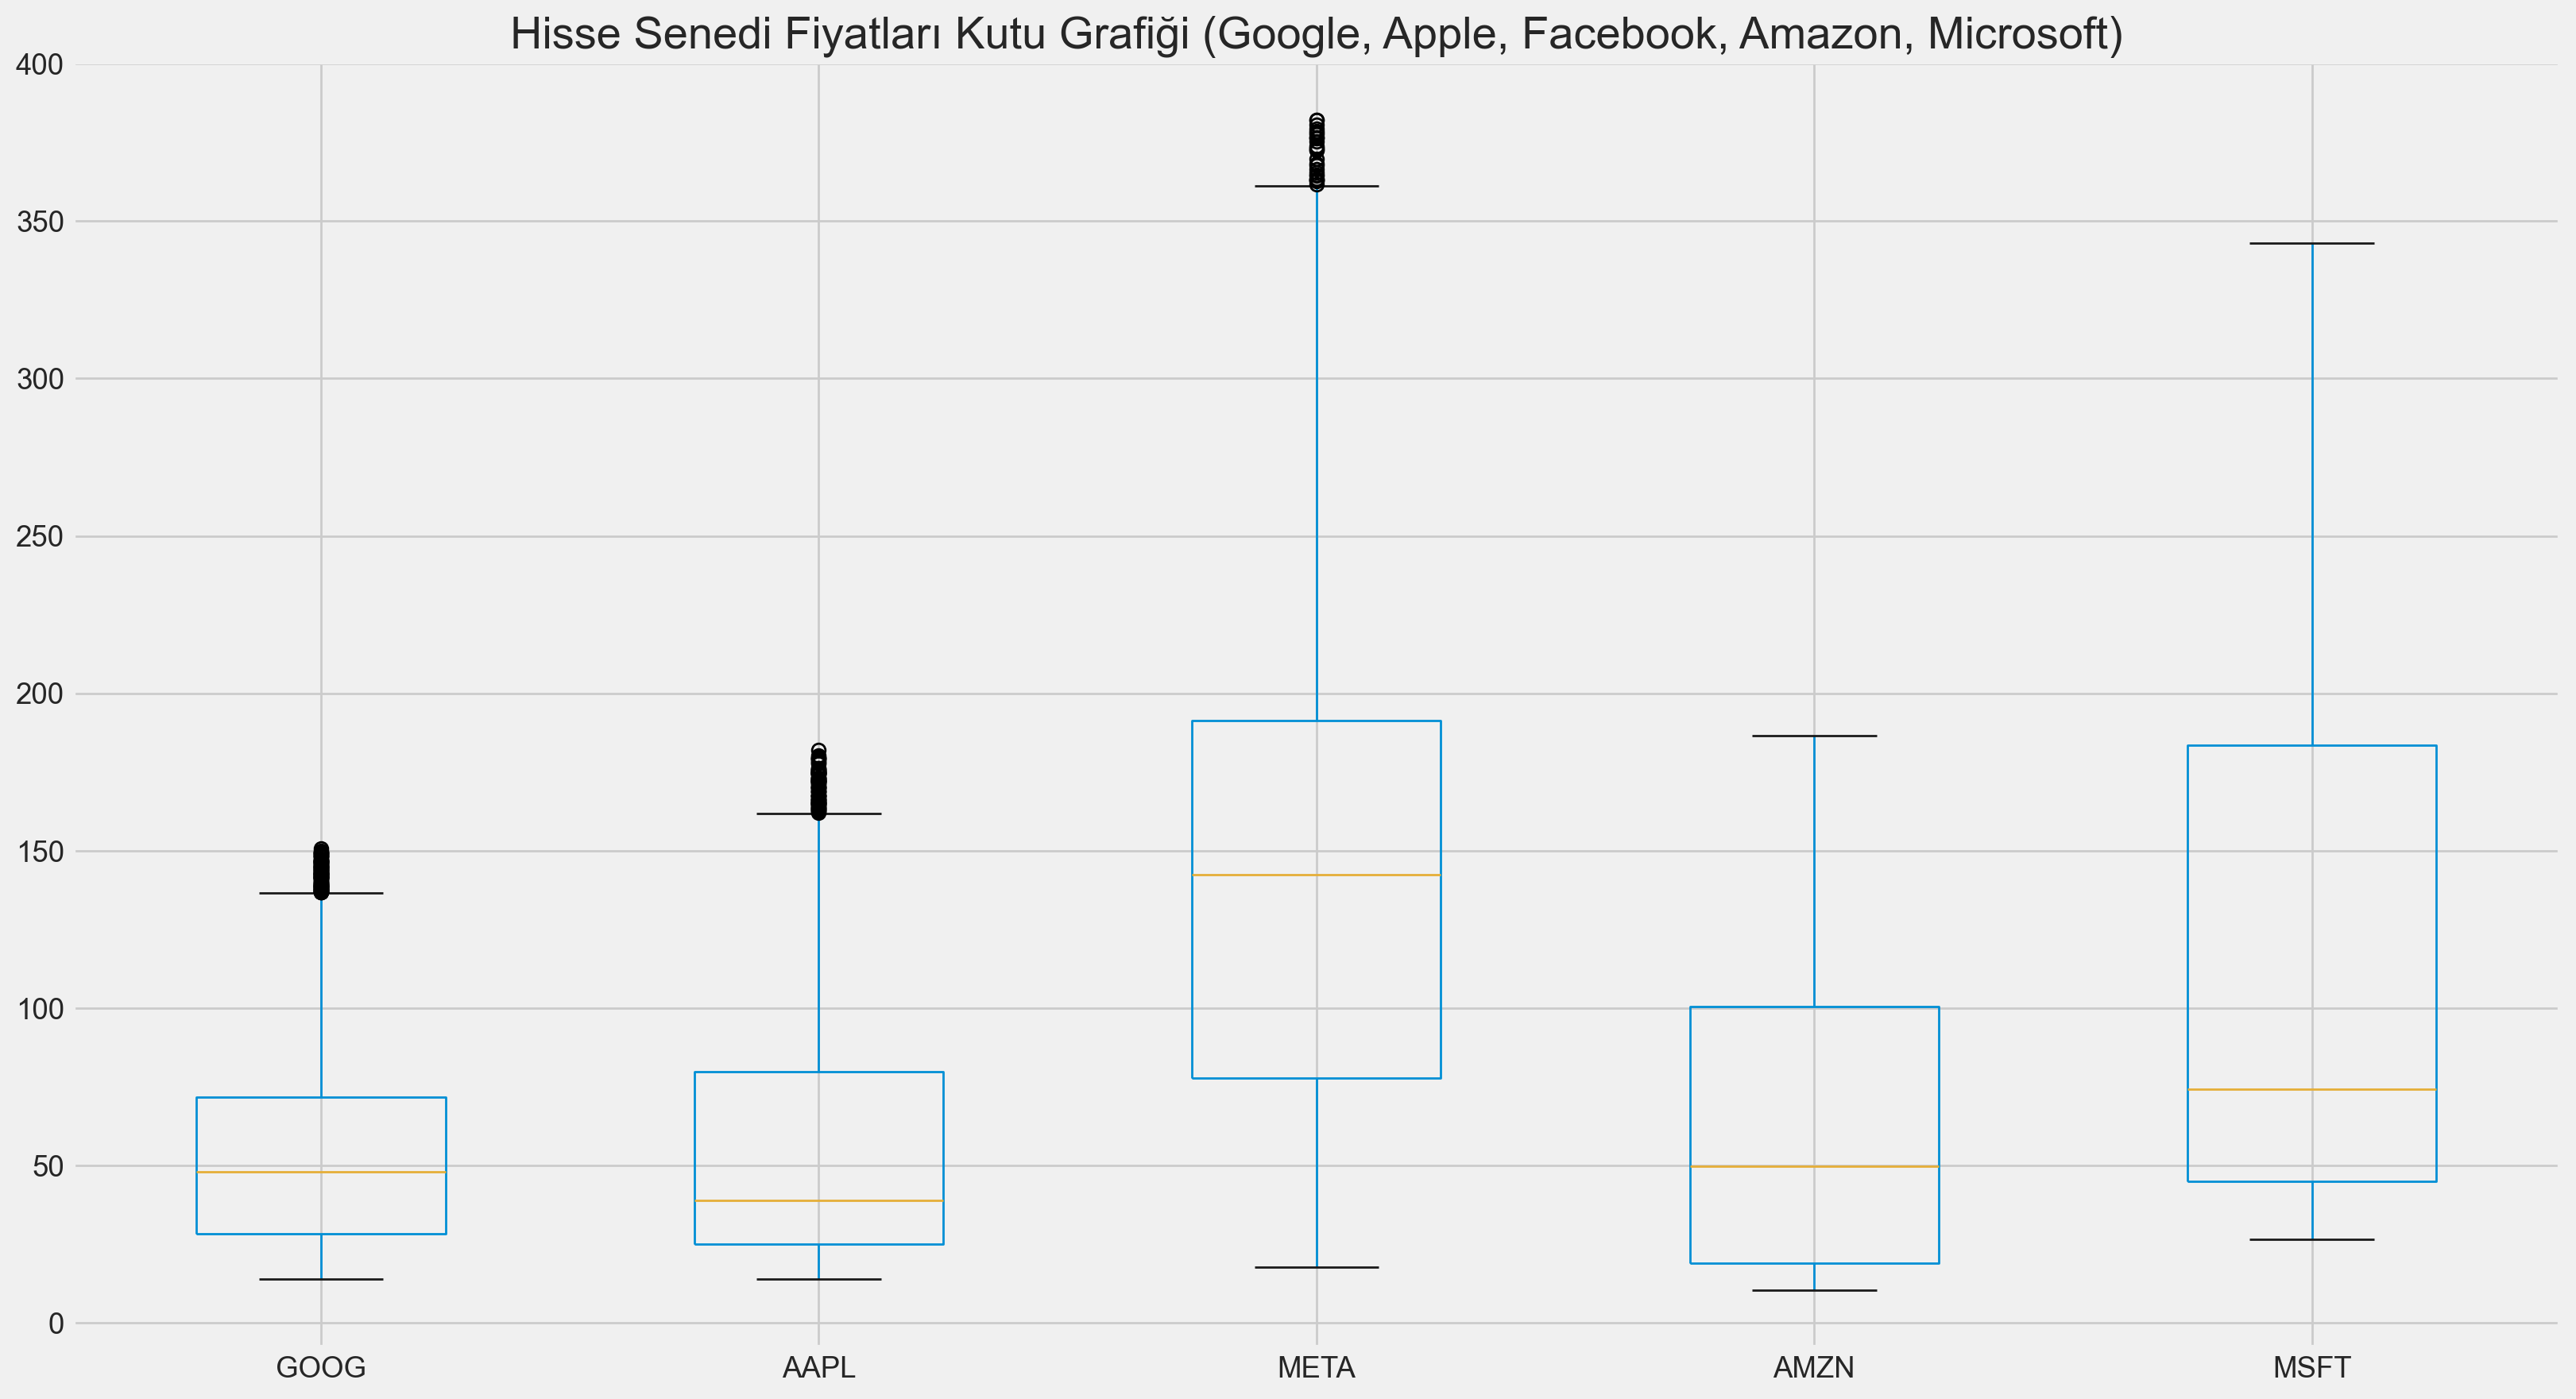

In [54]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Hisse Senedi Fiyatları Kutu Grafiği (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

> Kutu grafiği, Facebook, Apple ve Google hisse senedi fiyatlarında genel kalıptan önemli sapmalara işaret eden aykırı değerlerin varlığını ortaya koyuyor. Bu aykırı değerler, bu şirketlerin hisse senedi fiyatlarını etkileyen kayda değer olayların veya piyasa koşullarının meydana geldiğini göstermektedir. Bu aykırı değerleri etkileyen faktörleri ve bunların yatırım kararları üzerindeki etkilerini anlamak için daha fazla analiz yapılması gerekmektedir.

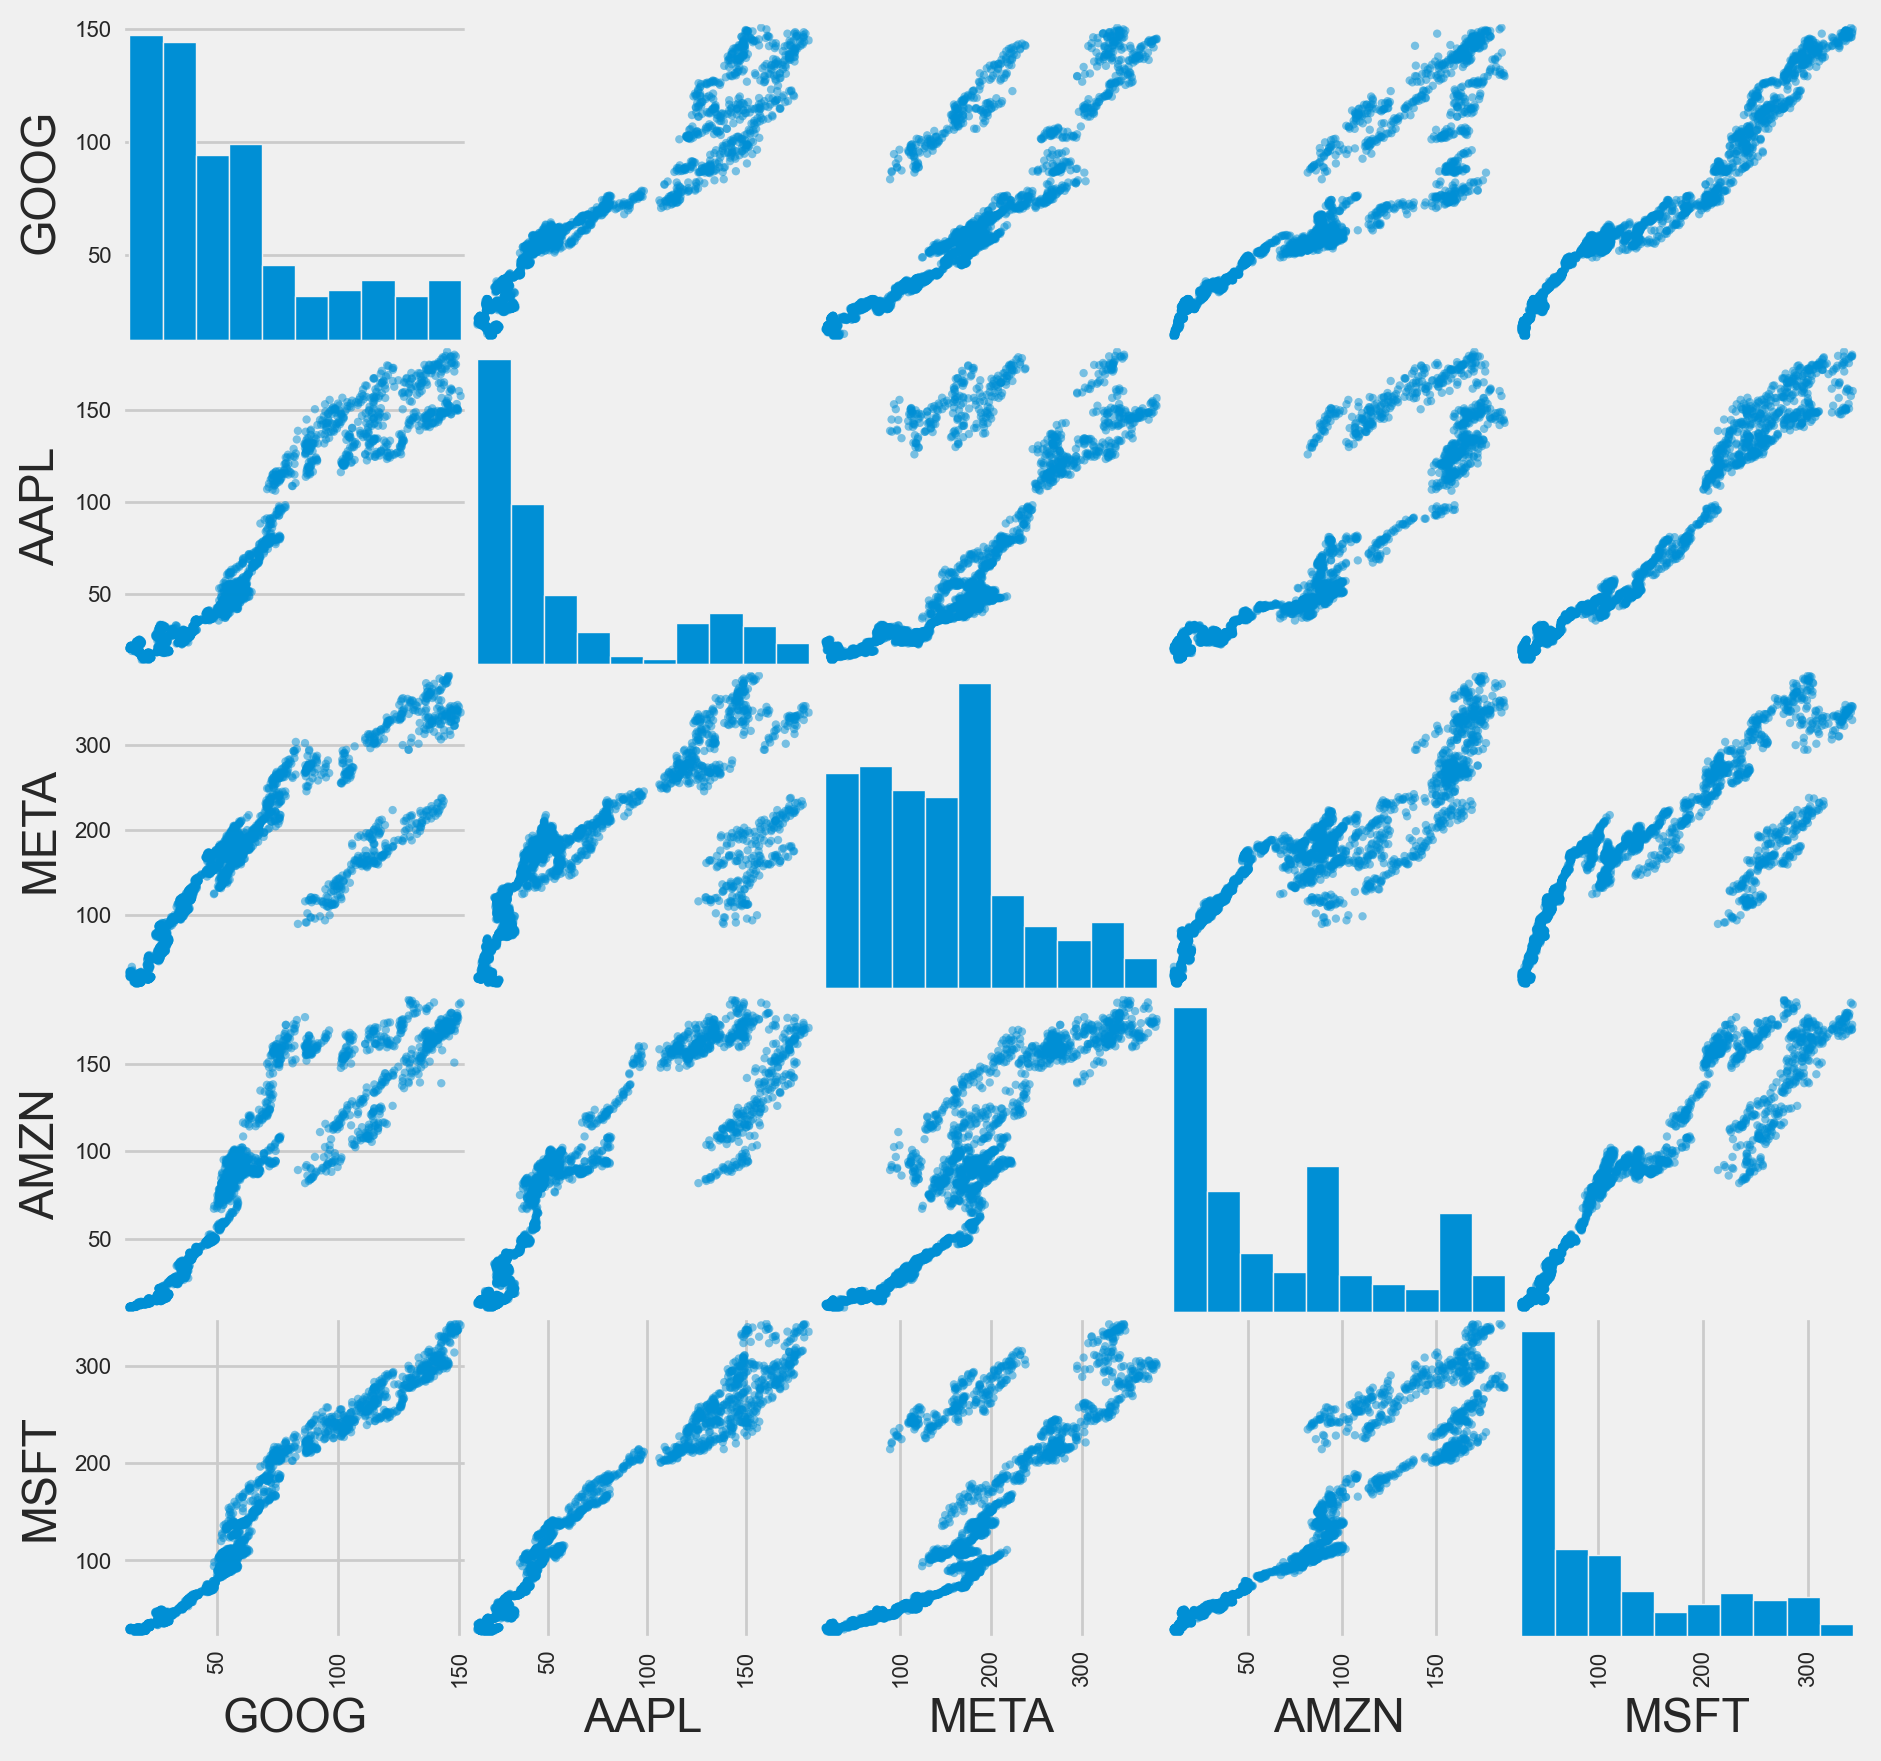

In [55]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

> Facebook, Apple ve Google'ın borsa dağılımları, verilerdeki potansiyel aykırı değerleri veya aşırı değerleri gösteren doğru bir çarpık model sergiliyor.

## Her şirketin kapanış fiyatları gelişiminin görselleştirilmesi

In [56]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, aynısını denerseniz aynı sonuçları alırsınız.
np.random.seed(RANDOM_SEED)

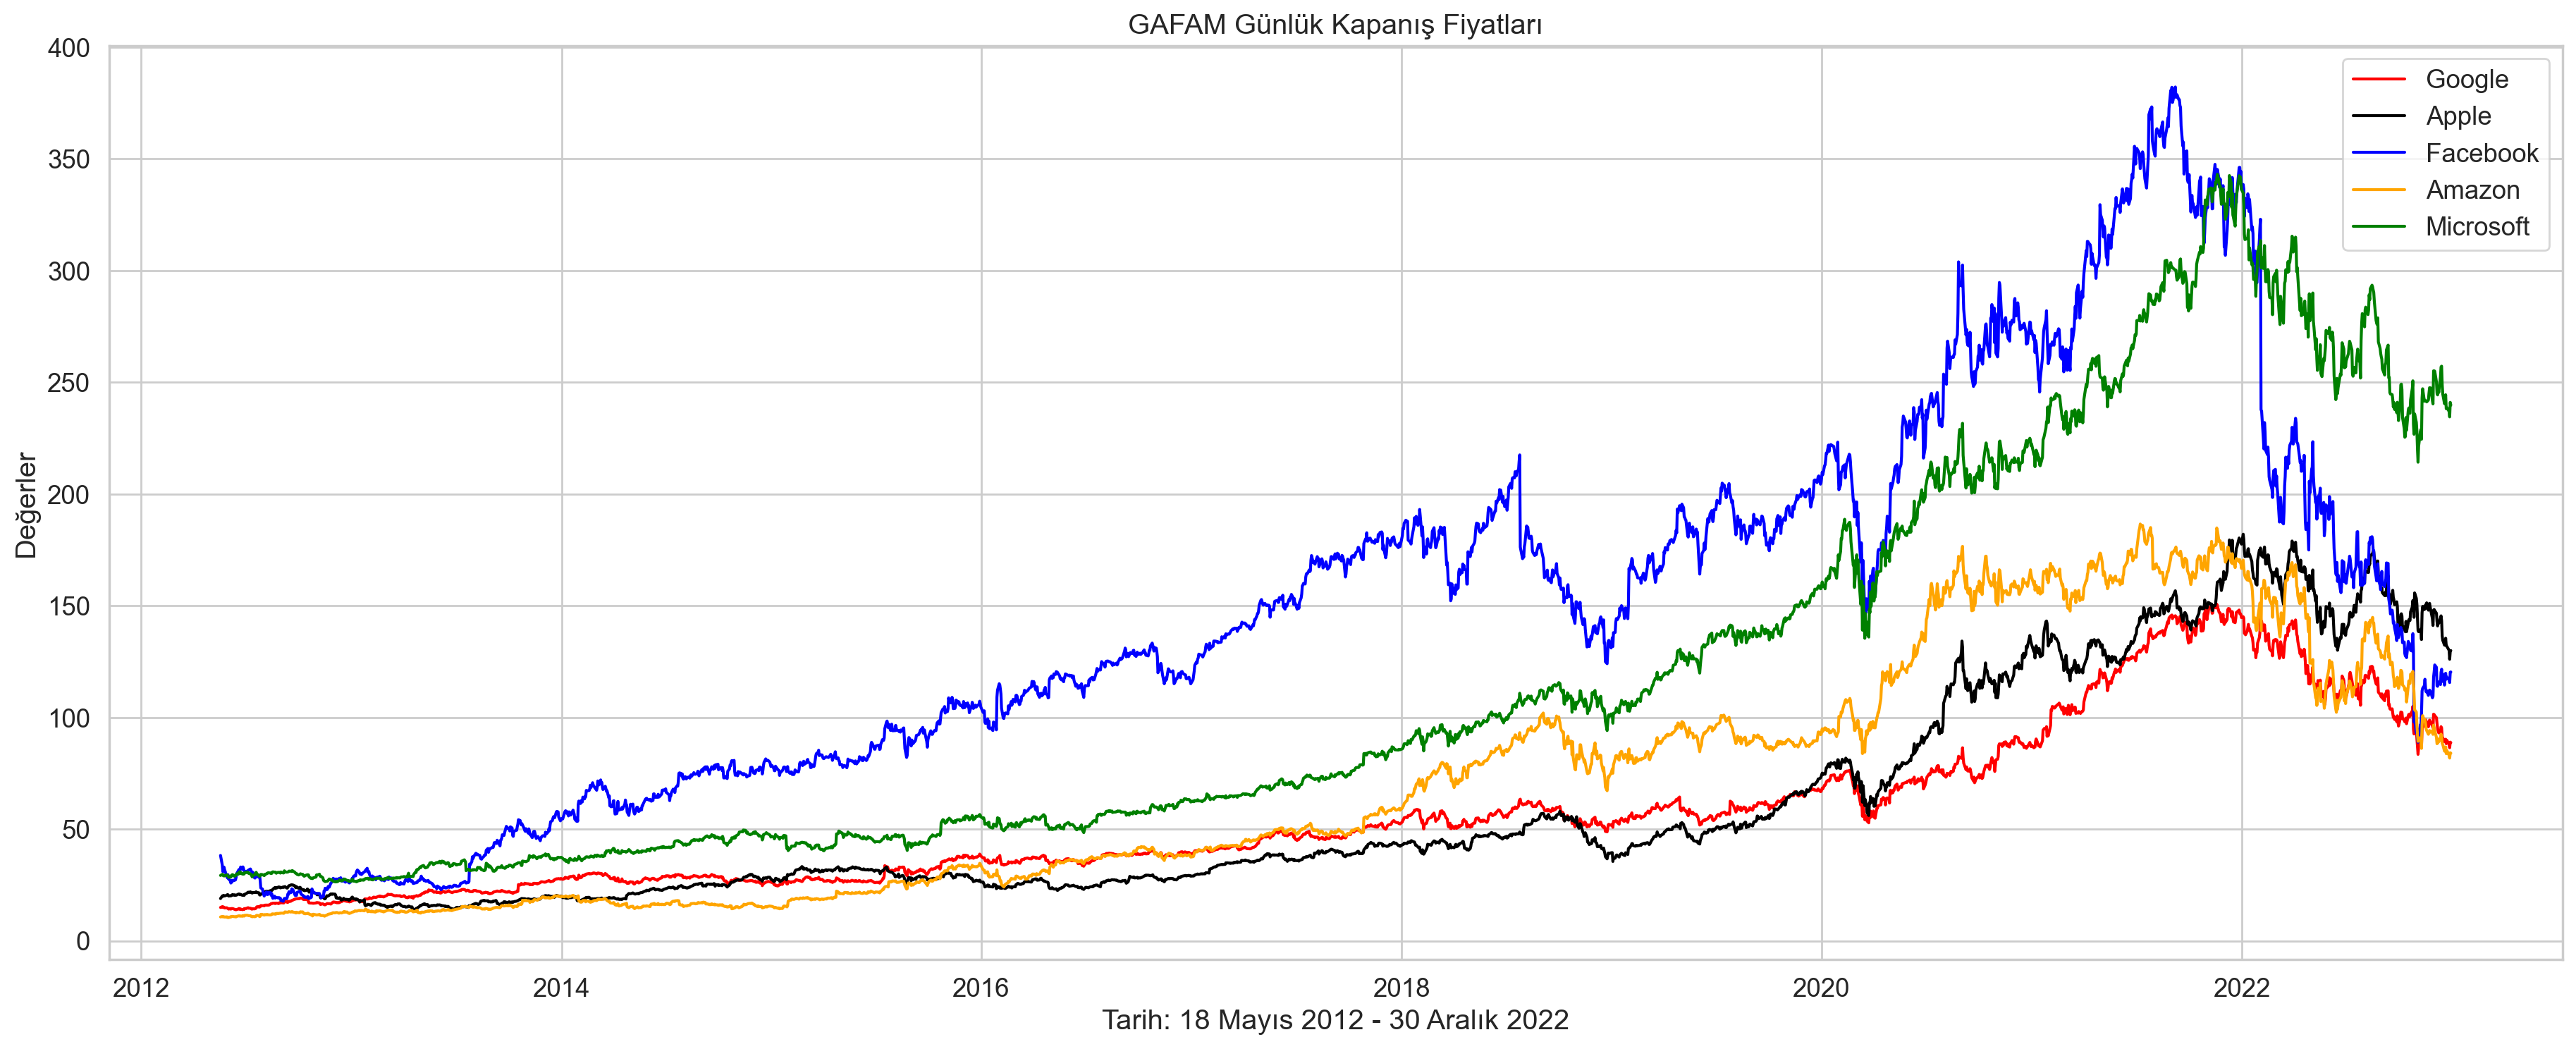

In [57]:
plt.figure(figsize=(20,8)) # Arsa Boyutunu Artırır
plt.grid(True)
plt.title('GAFAM Günlük Kapanış Fiyatları')
plt.xlabel('Tarih: 18 Mayıs 2012 - 30 Aralık 2022')
plt.ylabel('Değerler')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

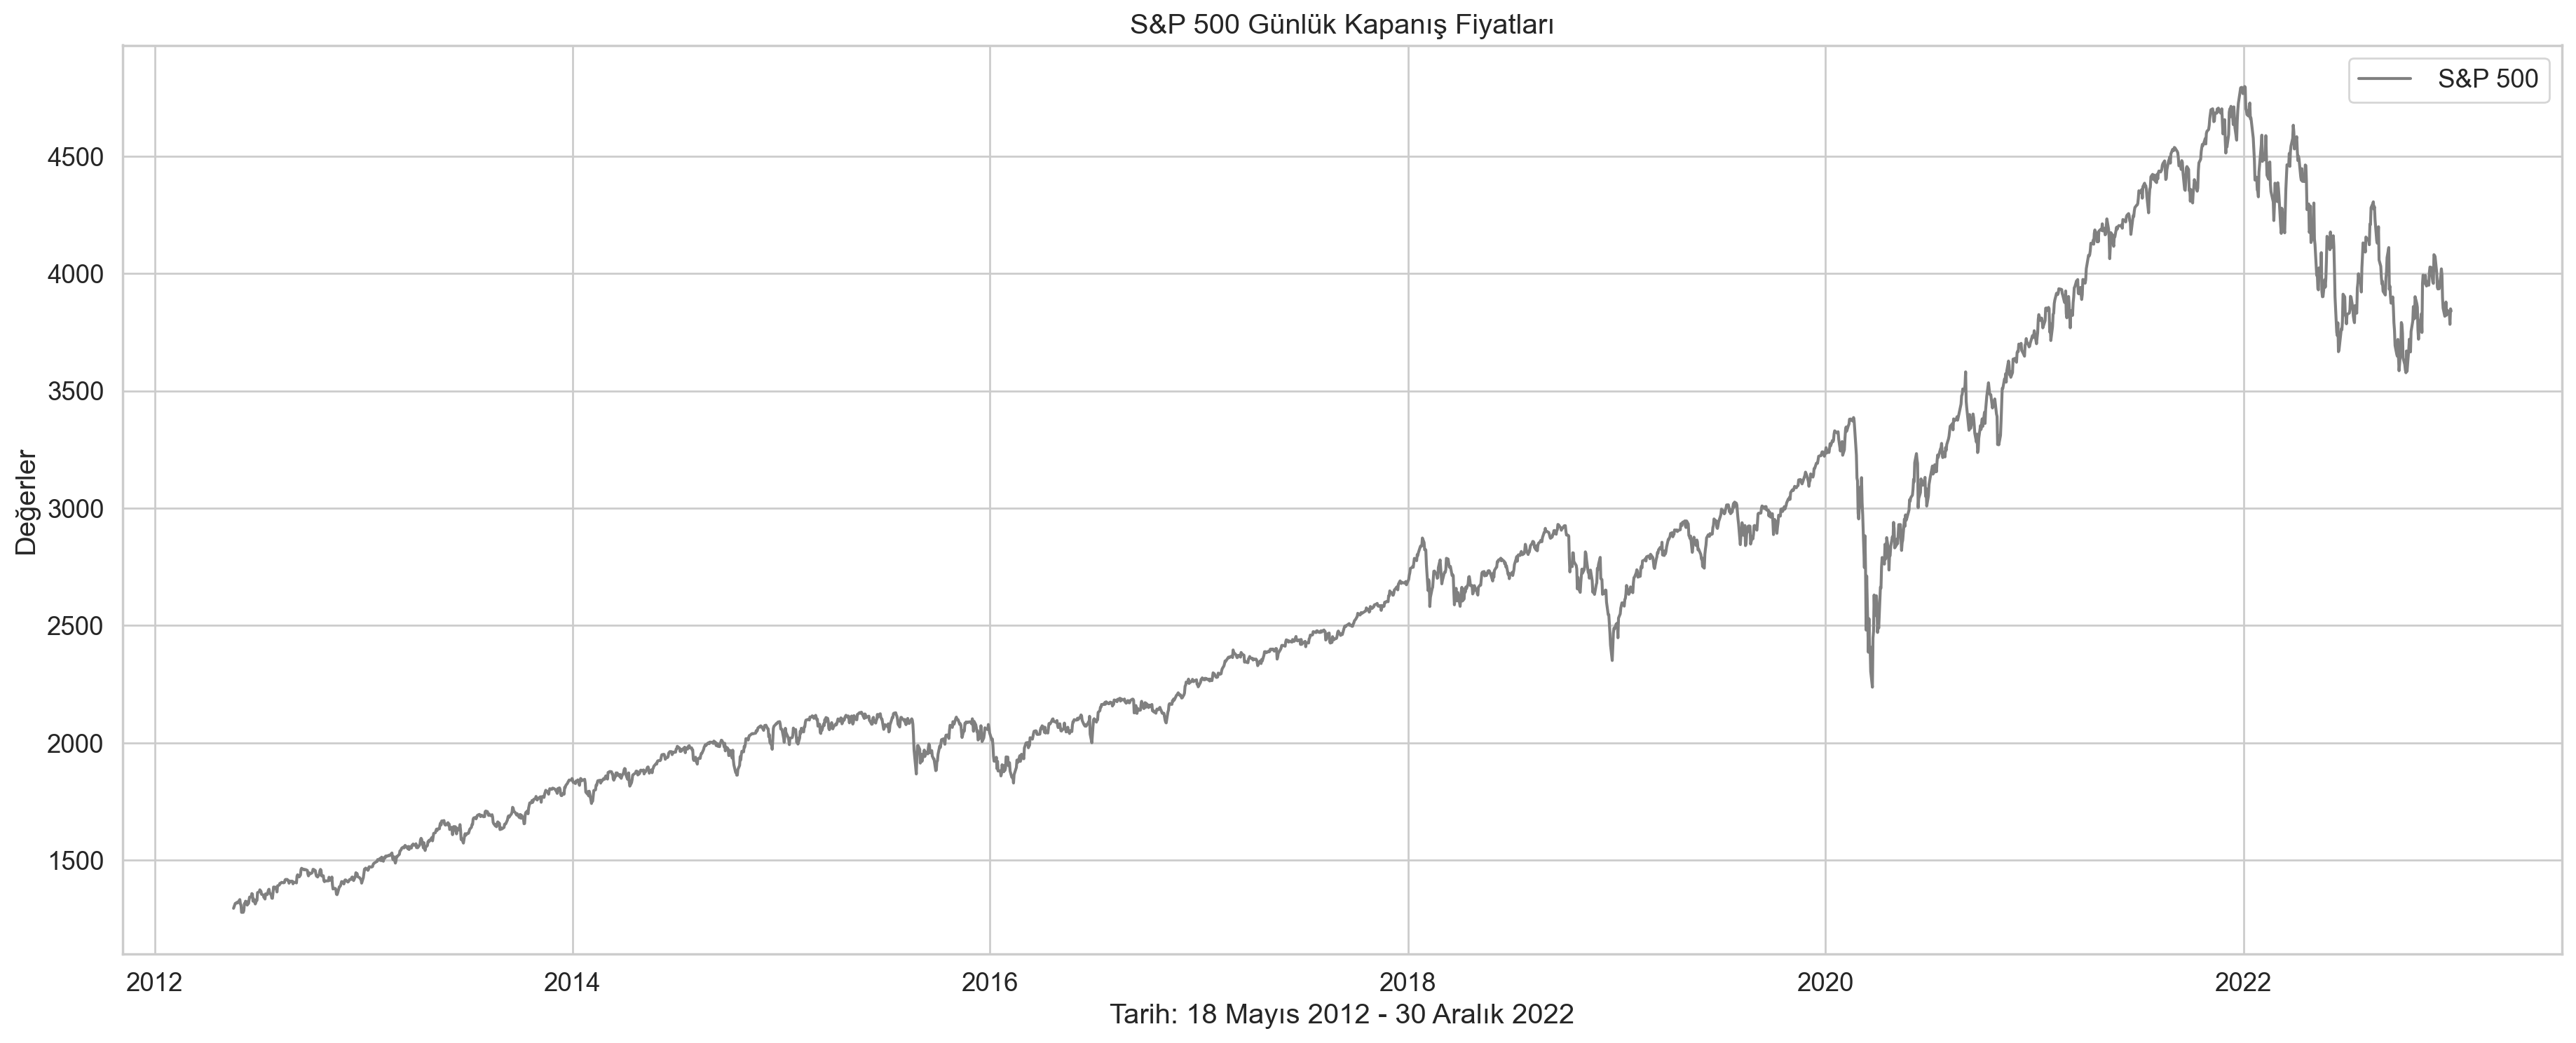

In [58]:
plt.figure(figsize=(20,8)) # Plot Size boytunu arttır
plt.grid(True)
plt.title('S&P 500 Günlük Kapanış Fiyatları')
plt.xlabel('Tarih: 18 Mayıs 2012 - 30 Aralık 2022')
plt.ylabel('Değerler')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

GAFAM şirketlerinin (Google, Apple, Facebook, Amazon ve Microsoft) hisse senedi fiyatları 2020 başındaki COVID-19 krizine kadar yükseldi, ardından toparlanma ve ardından dalgalanmalar yaşandı. Özellikle Facebook bu dönemde hisse senedi fiyatlarında önemli bir düşüş yaşadı.

## Standart risk ölçüsü: Volatilite (Getiri)

Volatilite, finansal varlıkların fiyat dalgalanmalarını ve istikrarını değerlendiren standart bir risk ölçüsüdür. GAFAM şirketlerinin (Google, Apple, Facebook, Amazon ve Microsoft) hisse senedi fiyatları, hızlı teknolojik gelişmeler ve piyasa aksaklıklarından kaynaklanan dinamik ve çoğu zaman değişken doğasıyla biliniyor. Bu yüksek oynaklık, bu şirketlere yatırım yapmanın getirdiği riskleri yansıtıyor. Öte yandan, 500 büyük ABD şirketini temsil eden geniş bir piyasa endeksi olan S&P 500, çeşitlendirilmiş yapısı nedeniyle genel olarak daha düşük oynaklık yaşıyor. Ancak piyasanın çalkantılı olduğu dönemlerde S&P 500 de artan volatilite sergileyebilir. Dalgalanmayı anlamak ve dikkate almak, yatırımcıların riski değerlendirmesi ve bilinçli yatırım kararları vermesi açısından çok önemlidir.

### Veri Kümesinde yeni bir sütun oluşturun - İadeler

Basit Getiri formülü, belirli bir dönemde bir yatırımın değerindeki yüzde değişimi ölçen temel bir hesaplamadır.

**Basit İade**
$$r_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$

In [59]:
# Create a new sütunlar Her şirketin veri kümesine geri dönün
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                  GOOG        AAPL        META       AMZN        MSFT  \
Date                                                                   
2012-05-18  14.953949   18.942142   38.230000  10.692500   29.270000   
2012-05-21  15.295419   20.045713   34.029999  10.905500   29.750000   
2012-05-22  14.963912   19.891787   31.000000  10.766500   29.760000   
2012-05-23  15.179603   20.377144   32.000000  10.864000   29.110001   
2012-05-24  15.035145   20.190001   33.029999  10.762000   29.070000   
...               ...         ...         ...        ...         ...   
2022-12-23  89.809998  131.860001  118.040001  85.250000  238.729996   
2022-12-27  87.930000  130.029999  116.879997  83.040001  236.960007   
2022-12-28  86.459999  126.040001  115.620003  81.820000  234.529999   
2022-12-29  88.949997  129.610001  120.260002  84.180000  241.009995   
2022-12-30  88.730003  129.929993  120.339996  84.000000  239.820007   

                   GSPC    R_GOOG

In [60]:
dataset.describe()

GOOG         AAPL         META         AMZN         MSFT  \
count  2673.000000  2673.000000  2673.000000  2673.000000  2673.000000   
mean     56.827974    60.044056   147.991912    70.188333   116.448706   
std      35.578551    48.235577    86.999128    53.709630    89.866126   
min      13.924059    13.947500    17.730000    10.411000    26.370001   
25%      28.241163    24.965000    77.830002    18.938499    44.830002   
50%      47.955502    38.867500   142.279999    49.758499    74.190002   
75%      71.591003    79.722504   191.289993   100.495003   183.429993   
max     150.709000   182.009995   382.179993   186.570496   343.109985   

              GSPC       R_GOOG       R_AAPL       R_META       R_AMZN  \
count  2673.000000  2672.000000  2672.000000  2672.000000  2672.000000   
mean   2664.394164     0.000809     0.000889     0.000751     0.000978   
std     904.069600     0.016898     0.018314     0.025274     0.020336   
min    1278.040039    -0.111008    -0.128647    -0.263901    -0.140494   
25%    1989.569946    -0.006764    -0.007677    -0.010112    -0.008609   
50%    2473.449951     0.000688     0.000671     0.000870     0.000916   
75%    3197.520020     0.008903     0.010434     0.012629     0.011109   
max    4796.560059     0.160524     0.119808     0.296115     0.141311   

            R_MSFT       R_GSPC  
count  2672.000000  2672.000000  
mean      0.000930     0.000467  
std       0.016856     0.010953  
min      -0.147390    -0.119841  
25%      -0.006850    -0.003640  
50%       0.000681     0.000594  
75%       0.009257     0.005426  
max       0.142169     0.093828

In [61]:
# Her hisse senedinin günlük oynaklığı (% olarak)
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.016898
R_AAPL    0.018314
R_META    0.025274
R_AMZN    0.020336
R_MSFT    0.016856
R_GSPC    0.010953
dtype: float64

> Tanımlayıcı istatistik tablosu, her hisse senedinin standart sapmalarıyla temsil edilen risk düzeylerine ilişkin değerli bilgiler sağlar. Analiz edilen hisse senetleri arasında Facebook, 2,58$\%$ standart sapmayla en yüksek risk seviyesini sergiliyor; bu da nispeten daha önemli fiyat dalgalanmalarına ve potansiyel volatiliteye işaret ediyor. Facebook'un ardından Amazon, 2,03$\%$ standart sapmayla daha düşük ancak yine de önemli bir risk seviyesi gösteriyor.

 > Karşılaştırmalı olarak, S&P 500 piyasasıyla ilişkili risk, 1,1$\%$ standart sapması ile gösterildiği gibi nispeten daha düşüktür. Bu, ortalama olarak Facebook ve Amazon'un bireysel hisselerinin, S&P 500'ün temsil ettiği genel piyasadan daha yüksek risk taşıdığını gösteriyor. Bu bulgular, yatırım kararları verirken risk faktörlerini dikkate almanın önemini vurguluyor. Yatırımcılar, Facebook ve Amazon gibi belirli hisse senetlerinin daha geniş piyasayla karşılaştırıldığında daha yüksek riski hesaba katarak portföylerini risk iştahlarına göre tahsis etmeyi tercih edebilirler.

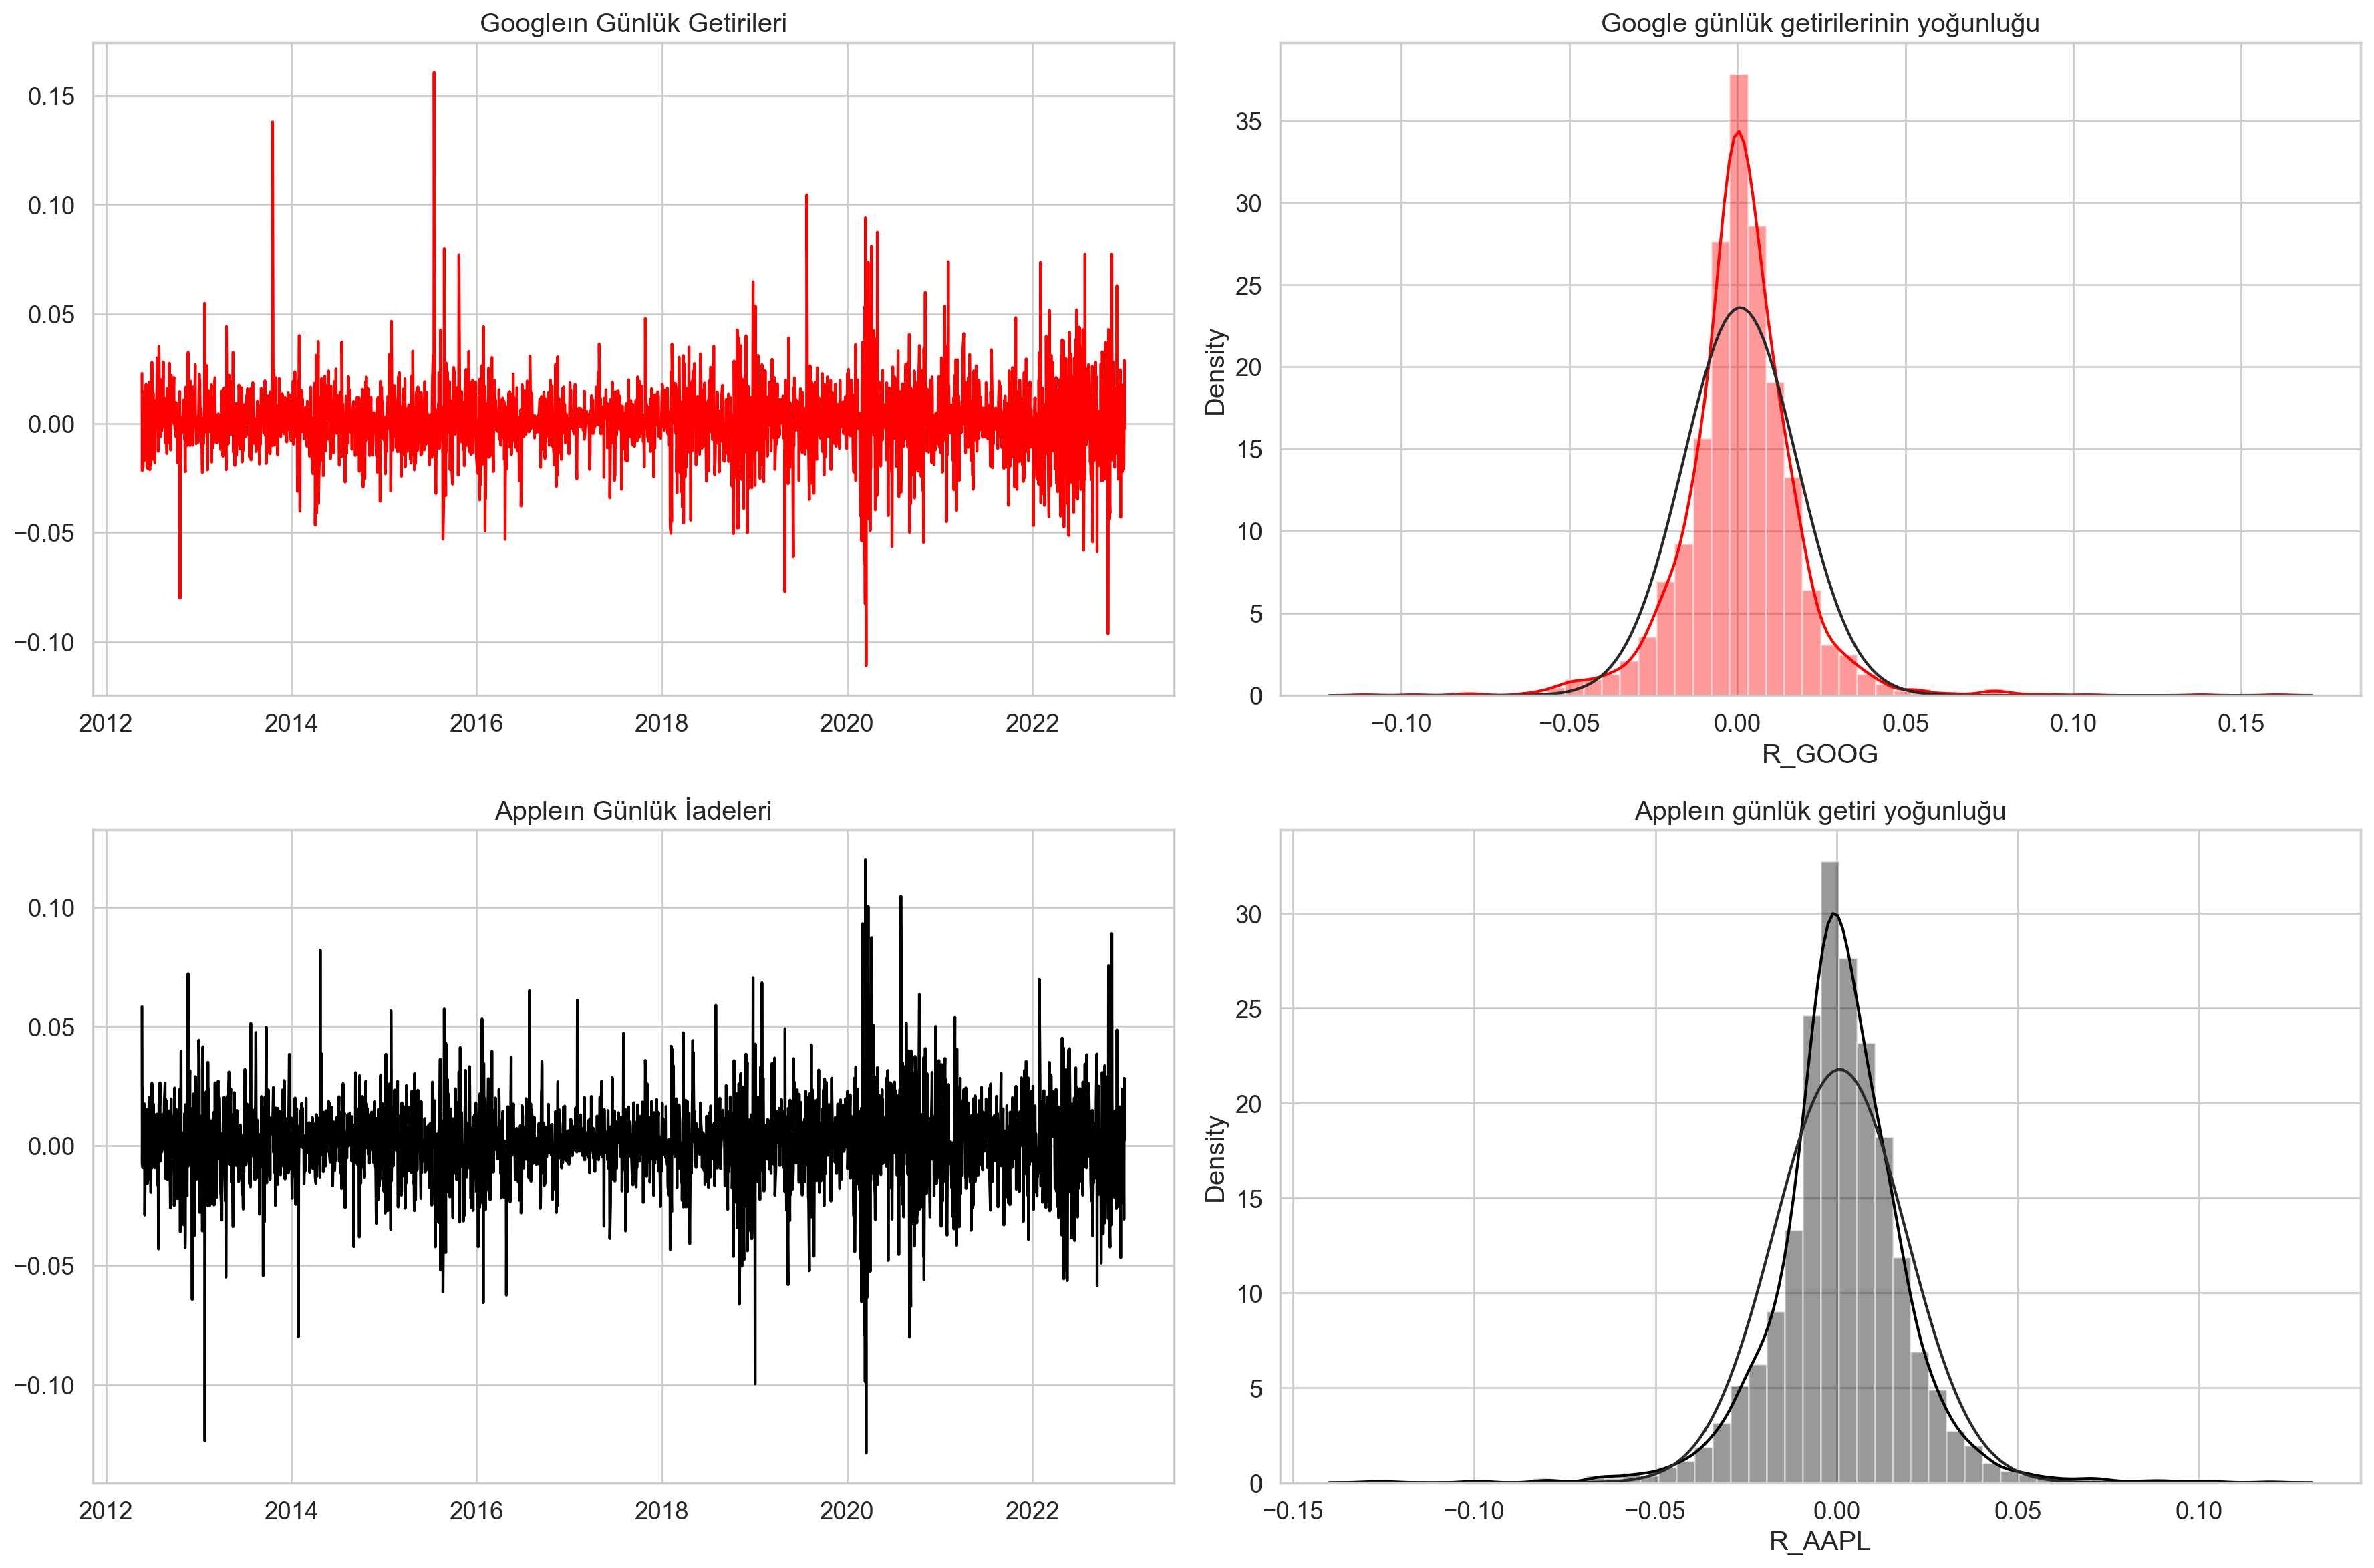

In [62]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Googleın Günlük Getirileri')

    sns.distplot(dataset['R_GOOG'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Google günlük getirilerinin yoğunluğu')

    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Appleın Günlük İadeleri')

    sns.distplot(dataset['R_AAPL'], norm_hist=True, fit=stats.norm, color='black',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Appleın günlük getiri yoğunluğu')
    plt.tight_layout()
    fig.show();

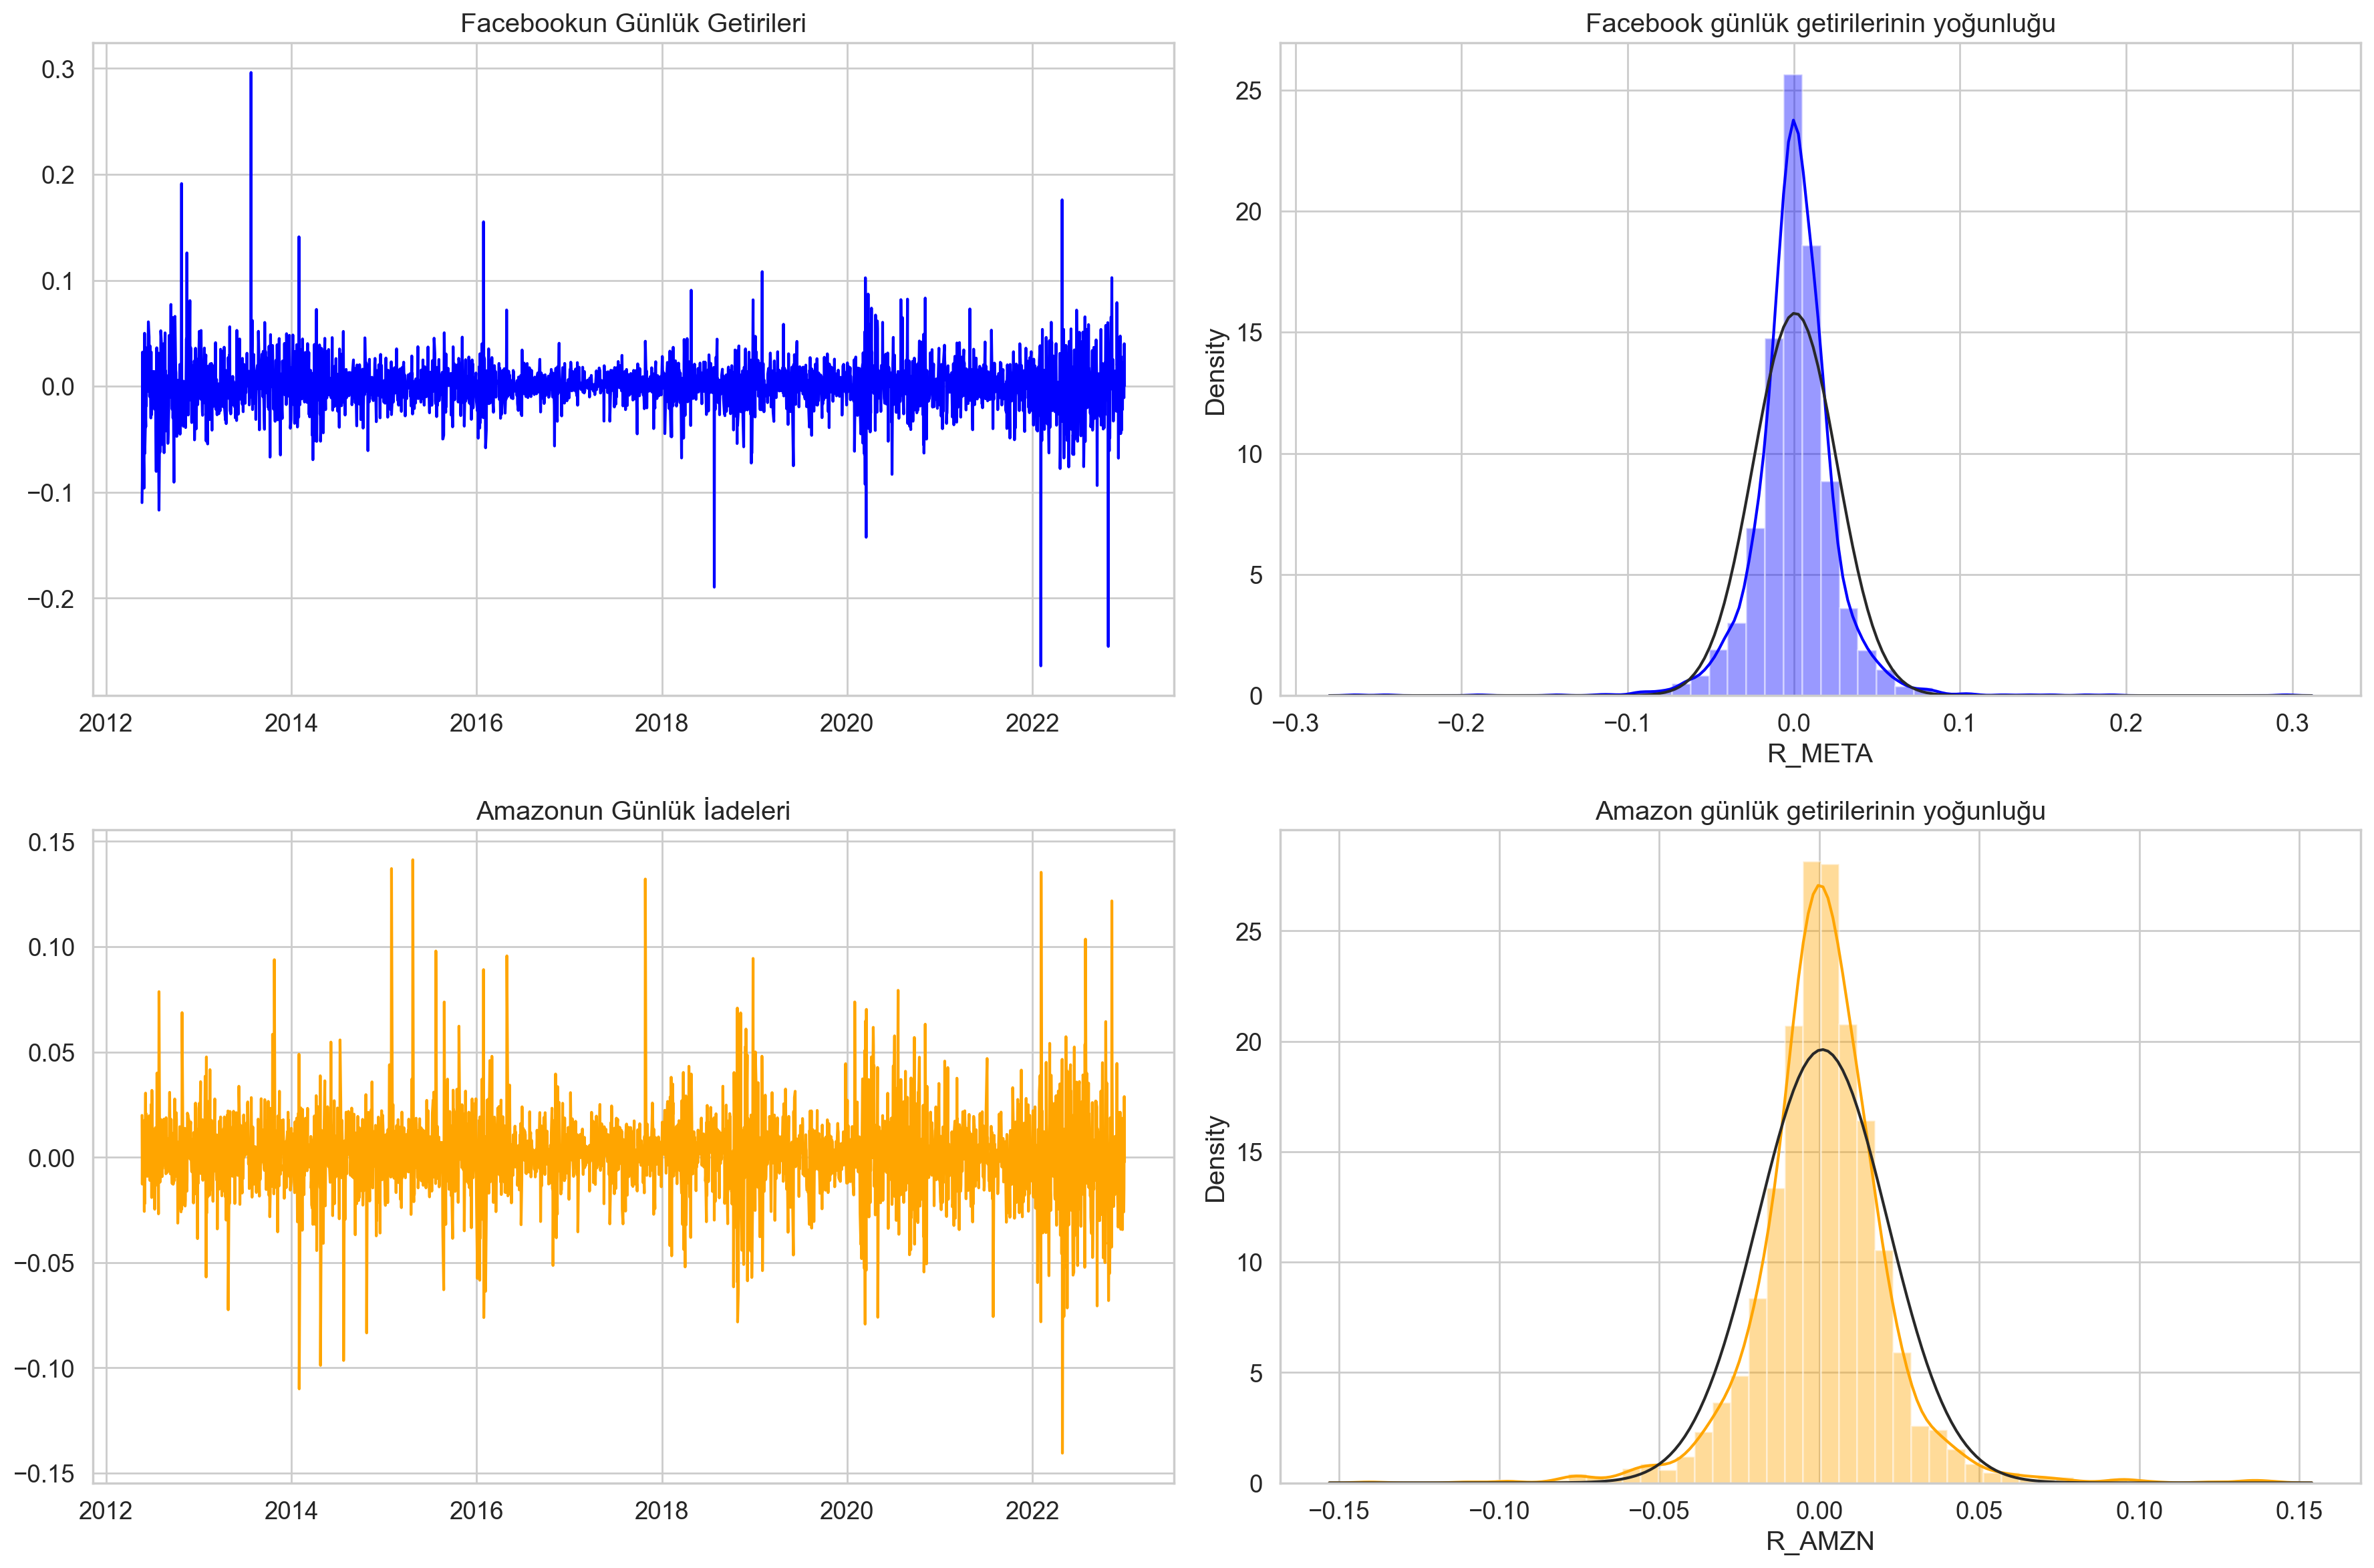

In [63]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Facebookun Günlük Getirileri')

    sns.distplot(dataset['R_META'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Facebook günlük getirilerinin yoğunluğu')

    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Amazonun Günlük İadeleri')

    sns.distplot(dataset['R_AMZN'], norm_hist=True, fit=stats.norm, color='orange',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Amazon günlük getirilerinin yoğunluğu')
    plt.tight_layout()
    fig.show();

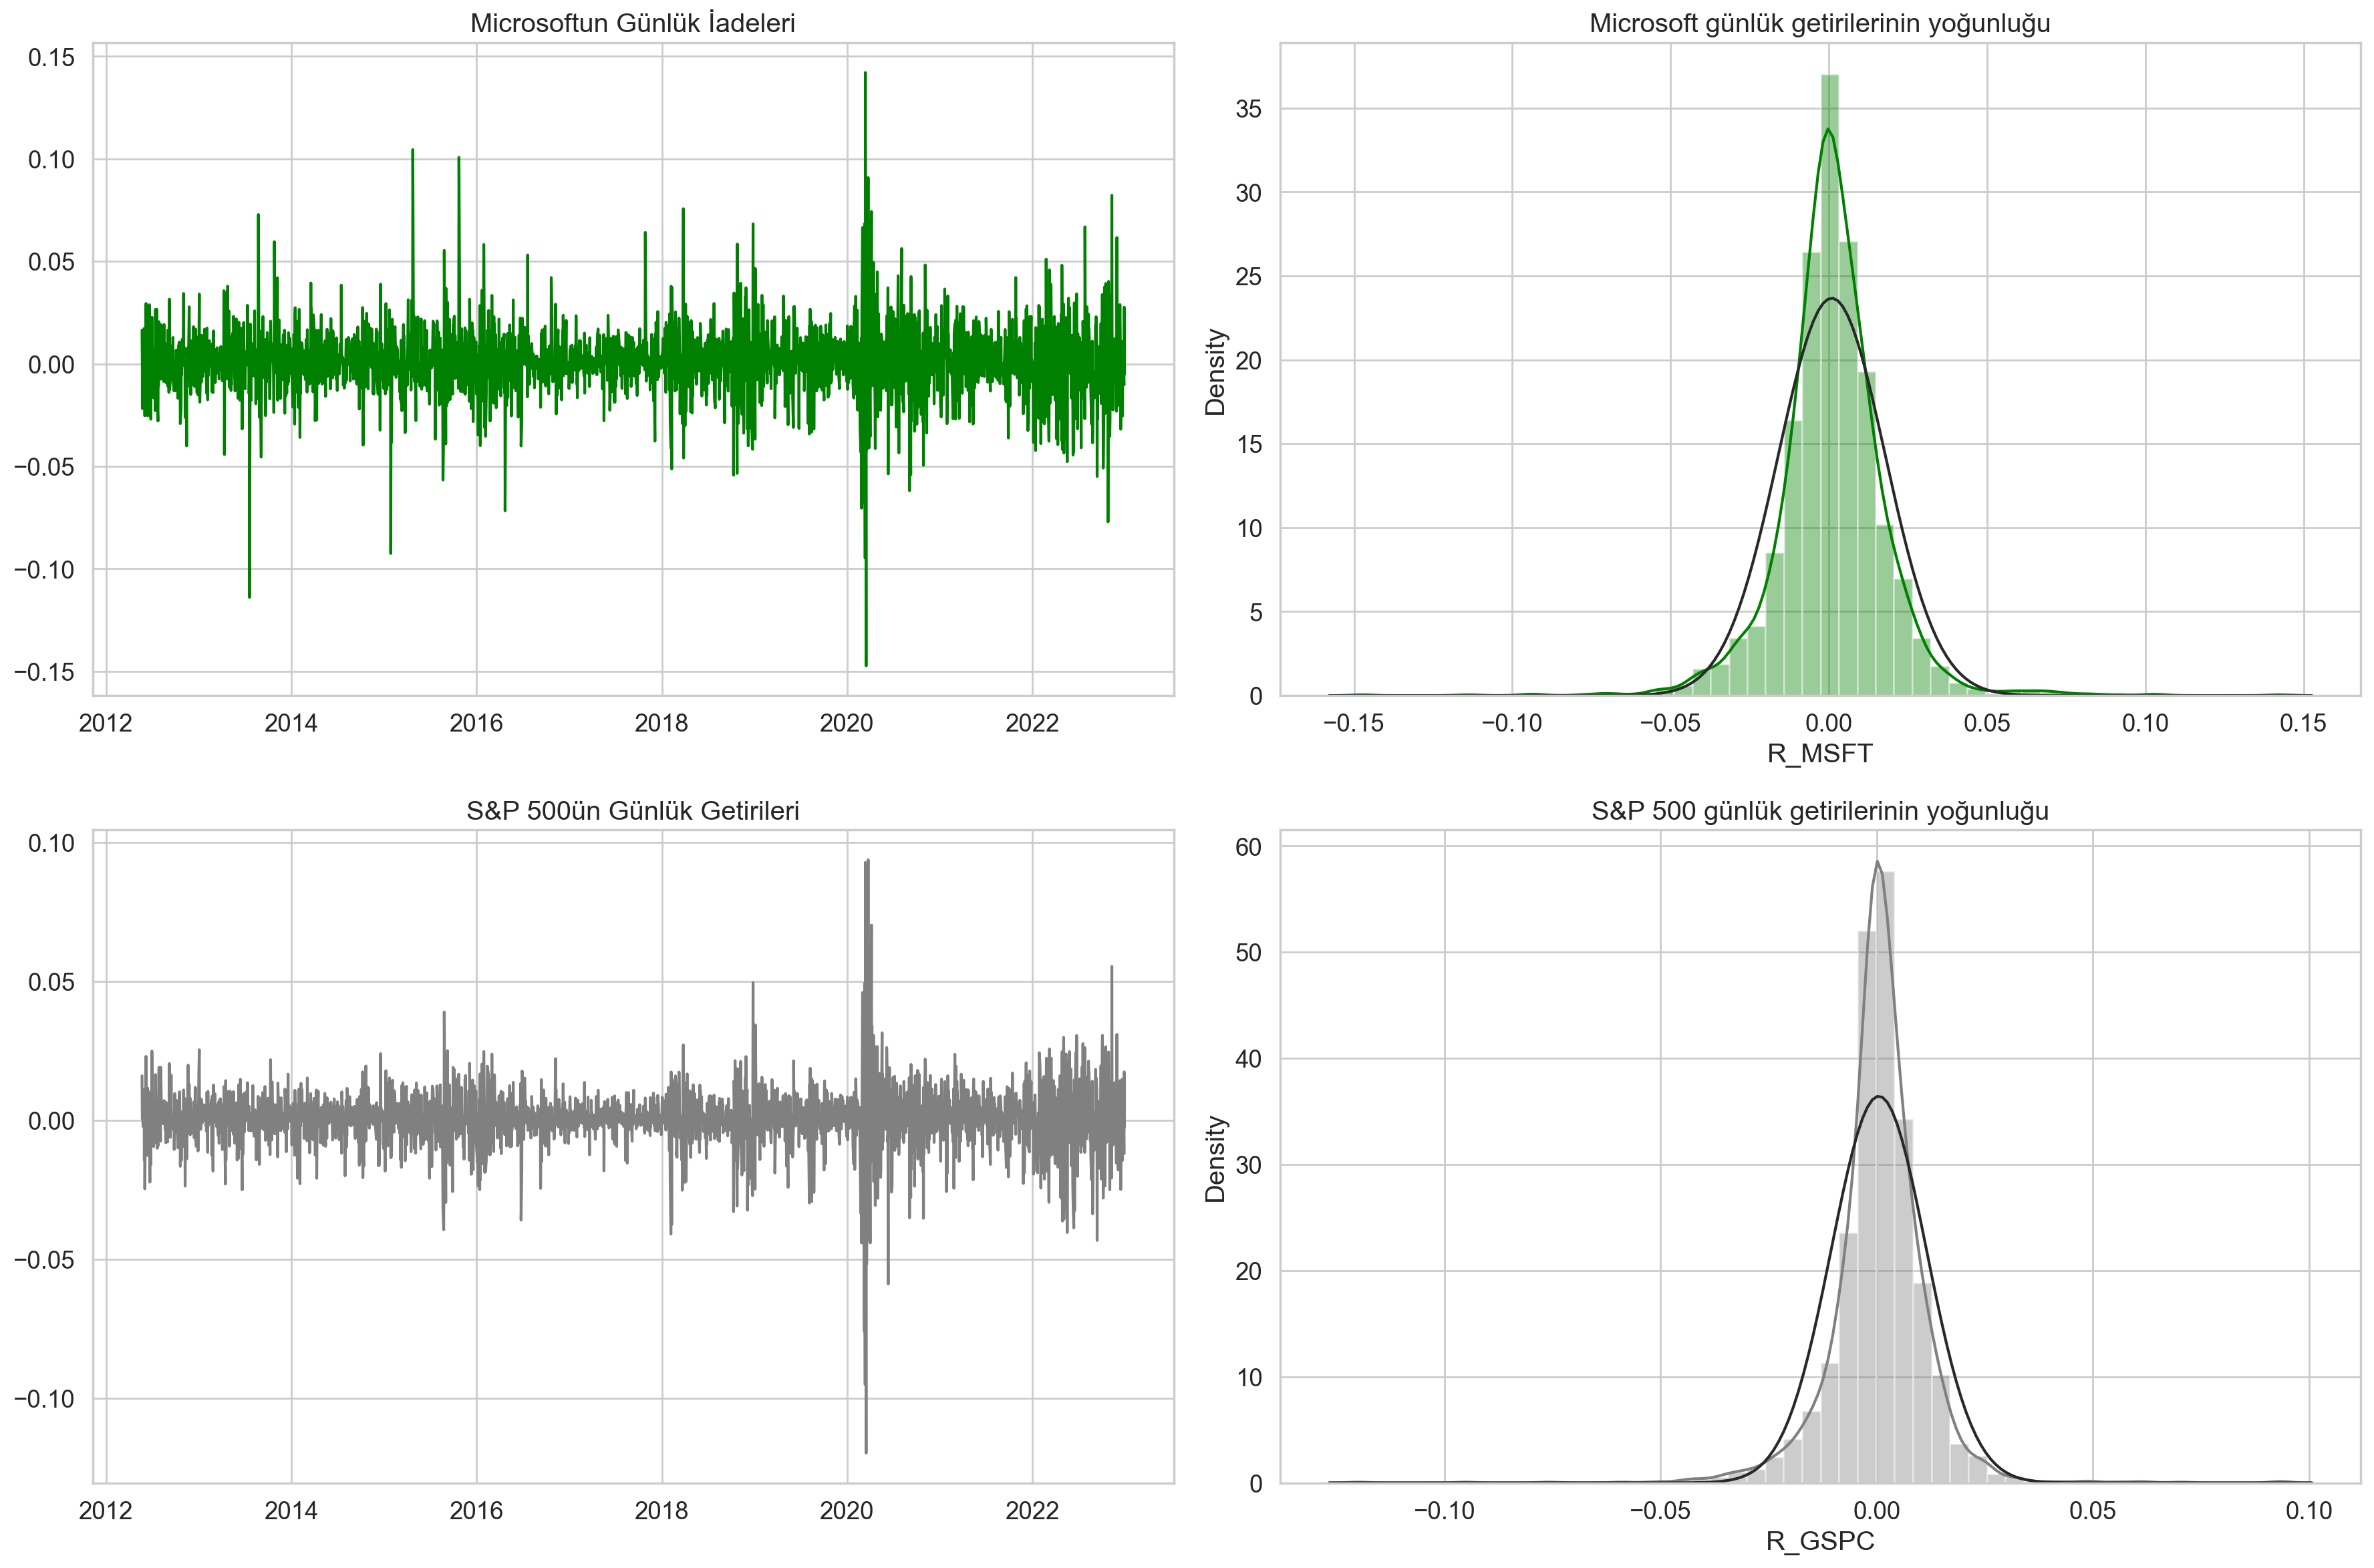

In [64]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Microsoftun Günlük İadeleri')

    sns.distplot(dataset['R_MSFT'], norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Microsoft günlük getirilerinin yoğunluğu')

    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('S&P 500ün Günlük Getirileri')

    sns.distplot(dataset['R_GSPC'], norm_hist=True, fit=stats.norm, color='grey',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('S&P 500 günlük getirilerinin yoğunluğu')
    plt.tight_layout()
    fig.show();

> Dönüş grafikleri Microsoft, Apple, Google ve S&P 500'de, özellikle 2020'nin başında, COVID-19 krizi nedeniyle yüksek volatilitenin olduğu dönemleri gösteriyor. Bu süre zarfında hisse senedi getirileri, salgının piyasa belirsizliğini ve ekonomik etkisini yansıtan önemli dalgalanmalar ve artan volatilite yaşadı.

> Bu değişken dönemlerin dışında, her şirket için getiri yoğunluğunun kökene göre simetrik olduğu görülüyor, bu da pozitif ve negatif getirilerin dengeli bir dağılımına işaret ediyor. Ayrıca her şirketin getirileri normal dağılıma yakın bir yapı sergilemektedir. Bu, ortalama olarak, bu hisse senetlerinin getirilerinin, daha az uç değerlerle birlikte, ortalama değere yakın kümelenme eğiliminde olduğu anlamına gelir.

> Getirilerin değişkenliğini ve dağılımını anlamak yatırımcılar için çok önemlidir çünkü bu şirketlere yatırım yapmanın potansiyel riskleri ve getirileri hakkında fikir verir. Yatırımcıların geçmiş performansı değerlendirmesine ve risk iştahı ve getiri beklentilerine göre bilinçli kararlar almasına olanak tanır.

# Efficient Frontier kullanarak Portföy Optimizasyonu

Efficient Frontier'ı kullanan Portföy Optimizasyonu, GAFAM şirketlerinin (Google, Apple, Facebook, Amazon ve Microsoft) ve S&P 500'ün hisse senedi fiyatlarını dikkate alarak optimal bir yatırım portföyü oluşturmak için güçlü bir yaklaşımdır. Efficient Frontier, aşağıdakileri gösteren grafiksel bir temsildir: farklı portföy tahsisleri için risk ve getiri arasındaki denge. Portföy optimizasyon teknikleri, bu hisse senetlerinin geçmiş verilerini ve beklenen getirilerini korelasyonlarıyla birlikte analiz ederek, yatırımcıların belirli bir risk düzeyi için getiriyi en üst düzeye çıkaran veya istenen bir getiri düzeyi için riski en aza indiren optimal varlık kombinasyonunu belirlemesine yardımcı olabilir. Bu yaklaşım, yatırımcıların bilinçli kararlar almasına, yatırımlarını çeşitlendirmesine ve önde gelen teknoloji şirketleri ve S&P 500 tarafından temsil edilen daha geniş pazar bağlamında riski etkili bir şekilde yönetirken potansiyel olarak daha yüksek getiri elde etmelerine olanak tanır.

### Şirketlerin kapanış fiyatları arasındaki korelasyon katsayıları

Google, Apple, Facebook, Amazon, Microsoft ve S&P 500 kapanış fiyatları arasındaki korelasyon katsayıları, bireysel hisse senedi fiyatları ile genel piyasa arasındaki doğrusal ilişkinin derecesi hakkında fikir vermektedir. Bu katsayılar ilişkinin gücünü ve yönünü ölçerek yatırımcıların bu şirketlerin hisse senetleri ile daha geniş piyasa arasındaki senkronizasyon veya farklılık düzeyini anlamalarına yardımcı olur.

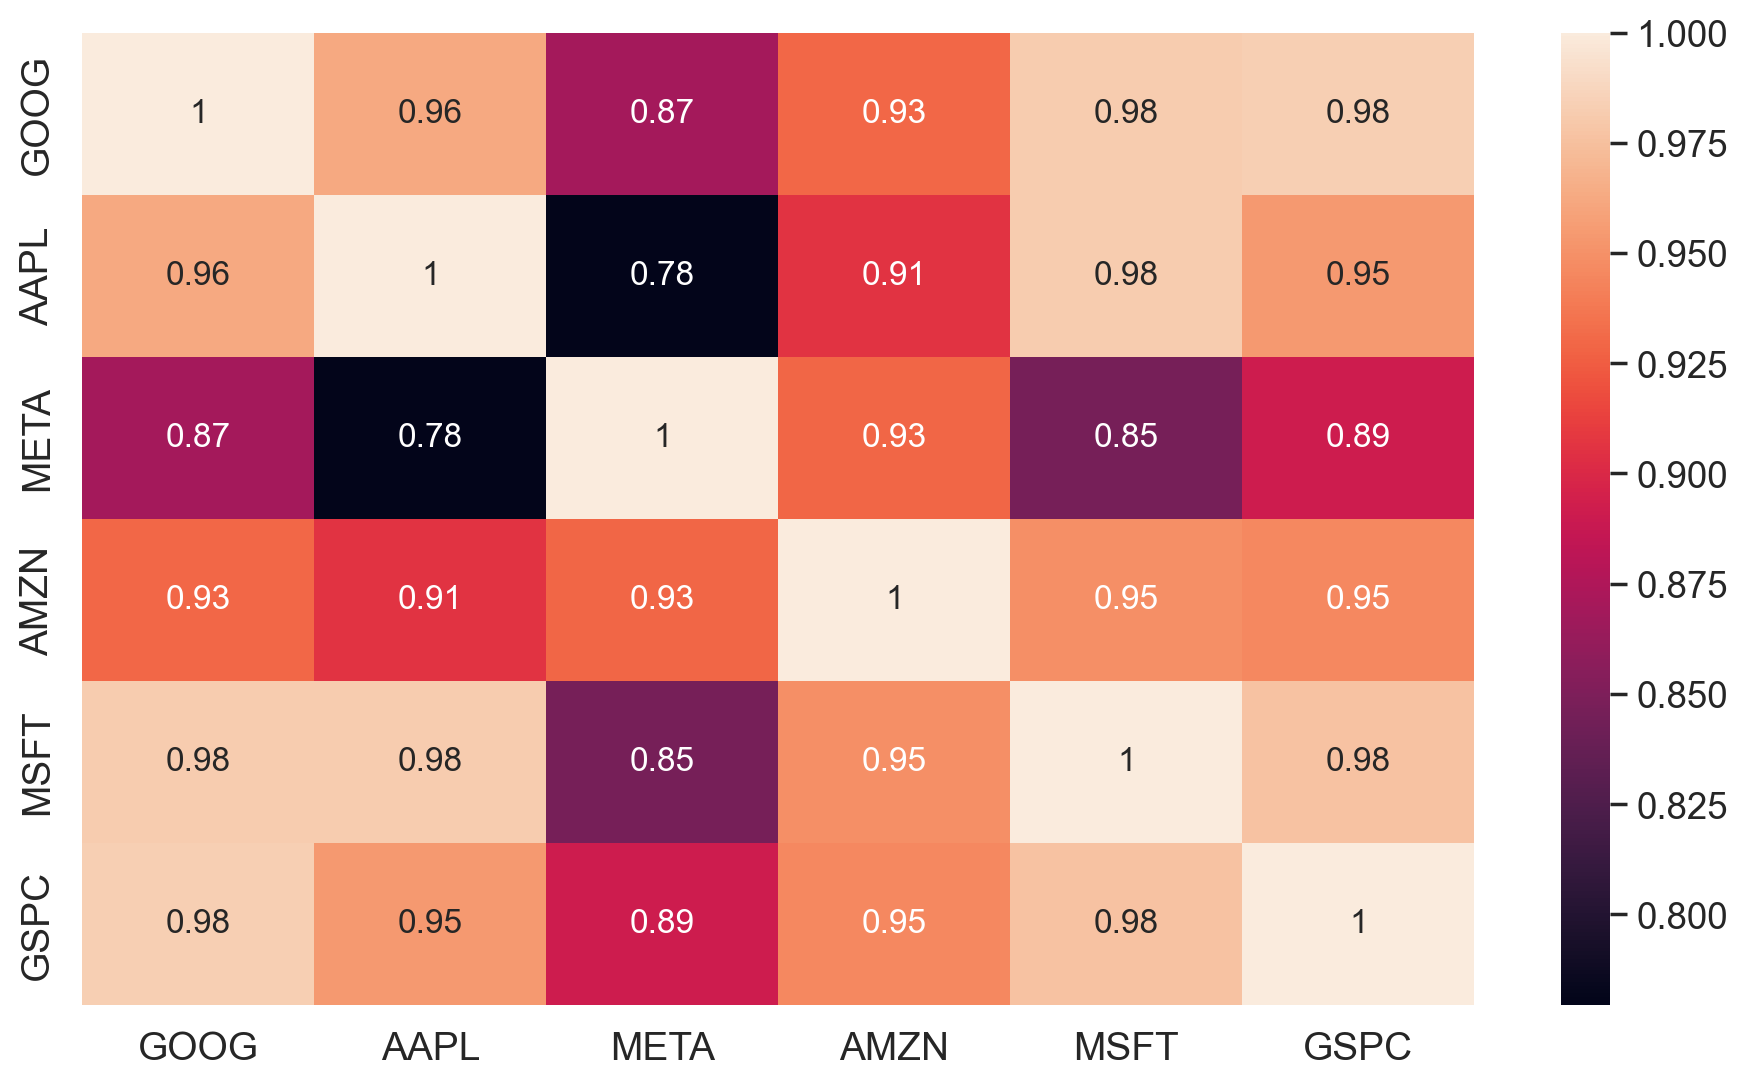

In [65]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

> Günlük fiyatların korelasyon haritası, S&P 500 ile Microsoft ve Amazon arasında ve Microsoft ile Google, Google ile Apple, Amazon ile Microsoft arasında güçlü pozitif korelasyonları ortaya koyuyor. Bu korelasyonlar, bu şirketlerin hisse senedi fiyatlarının benzer yönde hareket etme eğilimine işaret ederek, potansiyel karşılıklı bağımlılıkları vurguluyor ve portföy çeşitlendirme stratejileri için öngörü sağlıyor.

### Şirketlerin getirileri arasındaki korelasyon katsayıları

Google, Apple, Facebook, Amazon, Microsoft ve S&P 500'ün getirileri arasındaki korelasyon katsayıları, bu şirketlerin daha geniş bir pazara ilişkin getirilerinin karşılıklı bağımlılığı veya bağımsızlığının bir ölçüsünü sağlayarak yatırımcıların çeşitlendirme potansiyelini ve ilişkili riskleri değerlendirmesine yardımcı olur. bu hisse senetlerini portföylerine dahil etmektedir.

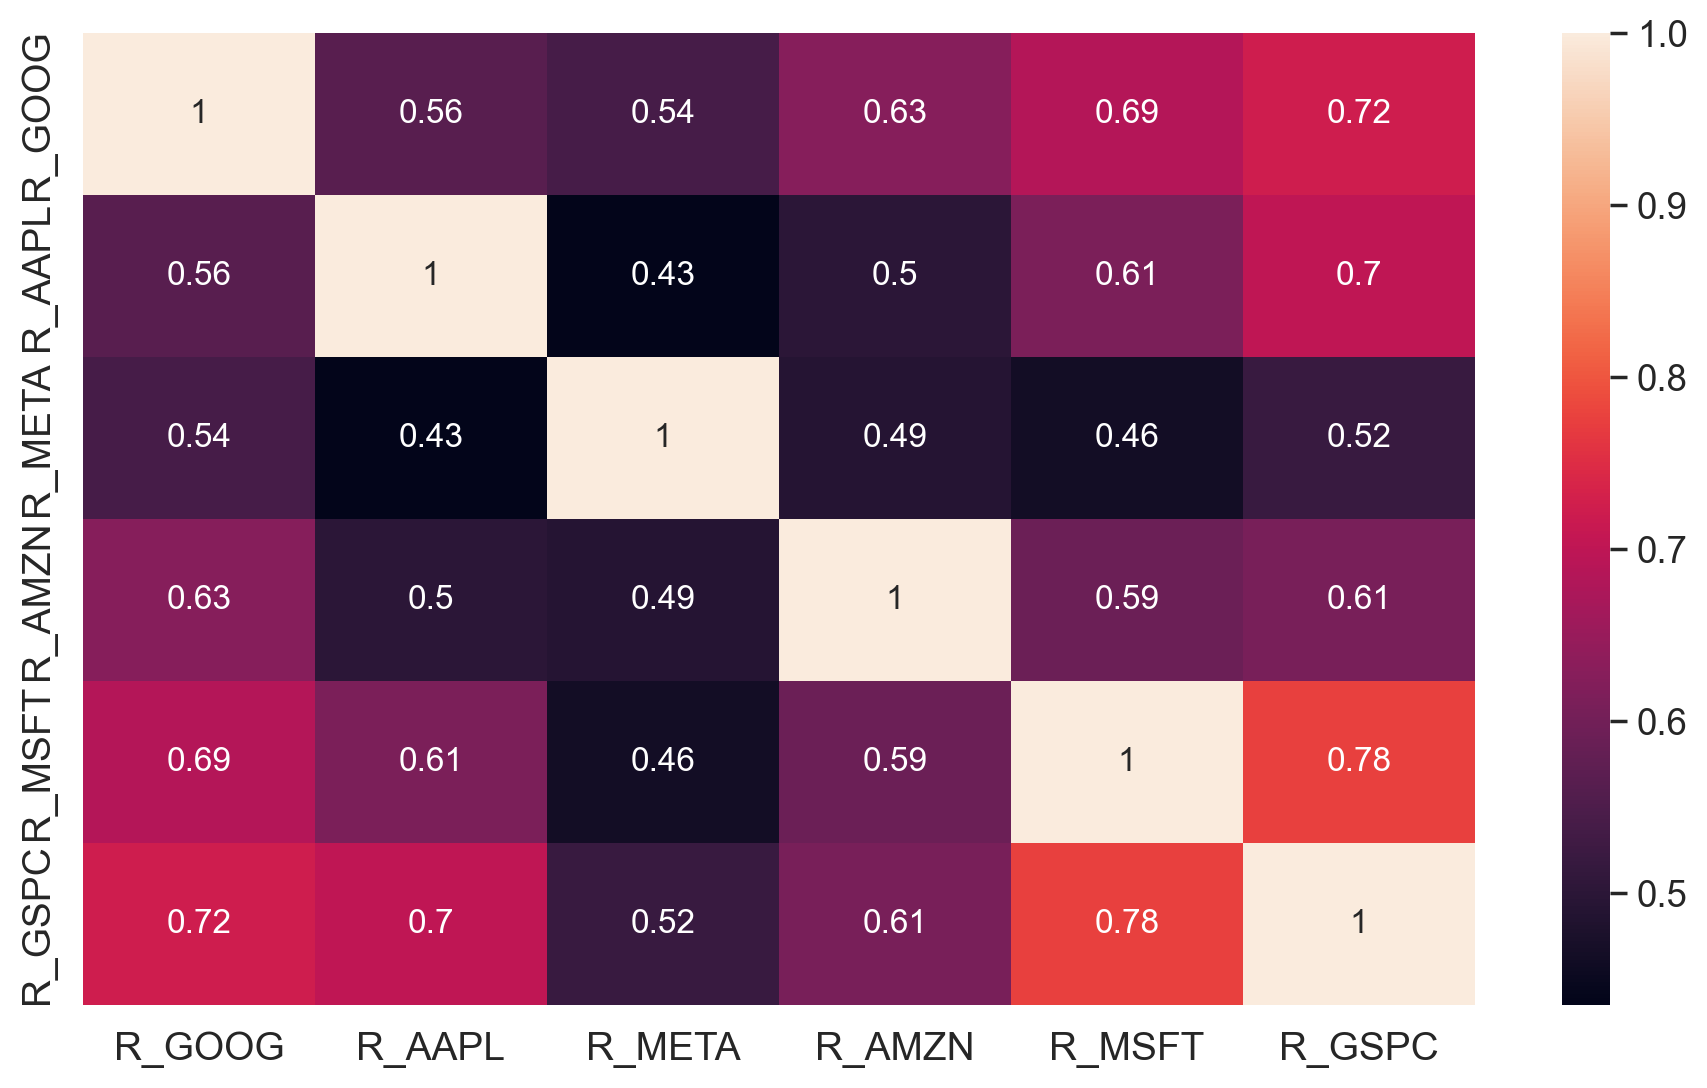

In [66]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

> Getiri fiyatlarının korelasyon haritası, S&P 500 getirileri ile Microsoft getirileri arasında güçlü bir pozitif korelasyon olduğunu gösteriyor. Bu, ikilinin benzer yönde hareket etme eğilimini gösteriyor ve genel piyasa performansı değişikliklerinin Microsoft'un hisse senedi getirilerini etkilediğini gösteriyor.

In [67]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("Hisse senedinin oynaklığı", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% yıl başına')

Hisse senedinin oynaklığı R_GOOG = 26.82 % yıl başına
Hisse senedinin oynaklığı R_AAPL = 29.07 % yıl başına
Hisse senedinin oynaklığı R_META = 40.12 % yıl başına
Hisse senedinin oynaklığı R_AMZN = 32.28 % yıl başına
Hisse senedinin oynaklığı R_MSFT = 26.76 % yıl başına
Hisse senedinin oynaklığı R_GSPC = 17.39 % yıl başına


We can see that the annual volatility of Meta ($41.01\%$) is higher than the other stocks.

In [68]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("Hisse senedinin oynaklığı", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% ay başına')

Hisse senedinin oynaklığı R_GOOG = 7.74 % ay başına
Hisse senedinin oynaklığı R_AAPL = 8.39 % ay başına
Hisse senedinin oynaklığı R_META = 11.58 % ay başına
Hisse senedinin oynaklığı R_AMZN = 9.32 % ay başına
Hisse senedinin oynaklığı R_MSFT = 7.72 % ay başına
Hisse senedinin oynaklığı R_GSPC = 5.02 % ay başına


Meta'nın aylık oynaklığının ($11,84\%$) hala diğer hisse senetlerine göre yüksek olduğunu görebiliyoruz.

> Meta diğer hisse senetlerine göre daha yüksek yıllık oynaklık ($41,01\%$) sergiliyor, bu da daha önemli fiyat dalgalanmalarına ve potansiyel riske işaret ediyor. Her ay bile Meta'nın oynaklığı (11,84$\%$) diğer hisse senetlerinden daha yüksek kalıyor ve bu da daha yüksek fiyat dalgalanmalarına işaret ediyor.

## Sharpe oranı

Sharpe oranı, Google, Apple, Facebook, Amazon, Microsoft ve S&P 500 gibi şirketler için riske göre ayarlanmış getiriyi ölçer. İlgili Sharpe oranlarını karşılaştırarak, her bir yatırımın getiri yaratmadaki verimliliğini, getiri düzeyine göre değerlendirebiliriz. risk. Daha yüksek bir Sharpe oranı, daha iyi riske göre ayarlanmış performansı gösterir; bu da satın almanın alınan riske göre daha yüksek getiri sağladığı anlamına gelir. Bu şirketlerin Sharpe oranlarının analiz edilmesi ve bunların S&P 500 ile karşılaştırılması, yatırımcıların her bir yatırım seçeneğinin risk ve getiriyi dengeleme konusundaki göreceli çekiciliğini değerlendirmesine yardımcı olur.

Aşağıdaki formülle hesaplanır:


* $R_p$ = Portföyün getirisi.

* $R_f$ = Risksiz oran.

* $\sigma_p$ = Portföyün fazla getirisinin standart sapması.

In [69]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    seri: Hisse senedi veya portföyün günlük getiri serisi
    rf: risksiz bir yatırımın yıllık getirisi (varsayılan rf=0,025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [70]:
# Yıllık getirisi %2,5 olan risksiz bir yatırım düşünelim ve
# her hisse senedinin Sharpe Oranını hesaplıyoruz
for col in returns.columns:
    print("Sharpe oranı,", col,"=", round(sharpe_ratio(returns[col]),2 ))

Sharpe oranı, R_GOOG = 0.67
Sharpe oranı, R_AAPL = 0.68
Sharpe oranı, R_META = 0.41
Sharpe oranı, R_AMZN = 0.69
Sharpe oranı, R_MSFT = 0.78
Sharpe oranı, R_GSPC = 0.53


**Sharpe Oranının Yorumlanması**

Sharpe oranı, bir hisse senedinin (veya portföyün) risk birimi başına aşırı getirisini verir.

* S\&P500'ün Sharpe oranı 0,53'tür. Bir birim risk göz önüne alındığında, S\&P500'ün yıllık getirisi 2,5$\%$ olan risksiz bir yatırıma kıyasla 53$\%$ fazla yıllık getirisi vardır.

* Aynı risk birimi için, Microsoft'un yıllık getirisi 2,5$\%$ olan risksiz bir yatırımla karşılaştırıldığında, Microsoft'un yıllık 78$\%$ fazla getirisi vardır.

Bu koşullar altında en iyi hisse senedi Microsoft'tur çünkü en yüksek Sharpe oranına sahiptir.

> Sharpe oranı, hisse senetlerinin veya portföylerin riske göre ayarlanmış performansını değerlendirmek için değerli bir ölçümdür. S&P 500'ün Sharpe oranı 0,53 olarak hesaplanıyor. Bu, belirli bir risk birimi için S&P 500'ün yıllık getirisi 2,5$\%$ olan risksiz bir yatırımla karşılaştırıldığında yıllık 53$\%$ fazla getiri ürettiği anlamına gelir.

> Microsoft dikkate alındığında Sharpe oranı, aynı risk seviyesi için yıllık 78$\%$ fazla getiriye işaret ediyor. Bu, Microsoft'un S&P 500'e kıyasla risksiz yatırıma göre önemli ölçüde daha yüksek getiri elde etme potansiyeline sahip olduğu anlamına geliyor.

> Bu bulgulara dayanarak, incelenen hisse senetleri arasında Microsoft'un en yüksek Sharpe oranına sahip olduğu söylenebilir. Bu, belirli bir risk düzeyi için Microsoft'un en iyi riske göre ayarlanmış getirileri sağlama potansiyeline sahip olduğunu gösterir. Dolayısıyla Sharpe oranı açısından ele alınan seçenekler arasında en uygun hisse senedi tercihi Microsoft'tur.

### Bir Güvenliğin Betası

Güvenlik betası, söz konusu menkul kıymetin piyasaya kıyasla nasıl performans gösterdiğini ölçer, örneğin S&P 500 (ABD Hisse Senetlerini hesaplıyorsanız. Genellikle her ülkenin piyasayı temsil eden bir endeksi vardır). Beta şunları söylüyor:

* $\beta = 0$ Piyasayla ilişkisi yok (ör. S\&P500).

* $\beta = 1$ Piyasadakiyle aynı performansı gösterir.

* $\beta<1$ Durgunlukta daha az kaybedersiniz ve gelişen ekonomide daha az kazanırsınız.

* $\beta>1$ Durgunlukta daha fazla kaybedersiniz ve gelişen ekonomide daha fazla kazanırsınız.

* $\beta<0$ Piyasayla olumsuz ilişkili. Yani, eğer piyasa yükselirse, güvenlik (hisse senedi ile birbirinin yerine kullanılır) düşer ve bunun tersi de geçerlidir. Örneğin. ALTIN, GÜMÜŞ, değerli metal vb.

Tesla'nın Beta'sını bulmaya çalışacağız. Beta olanı bulmak için genellikle aylık periyotlarla son 5 yıllık veriler dikkate alınır.

In [71]:
cov = returns.cov() * 12 # yıllıklandırılmış
cov

R_GOOG    R_AAPL    R_META    R_AMZN    R_MSFT    R_GSPC
R_GOOG  0.003426  0.002098  0.002770  0.002577  0.002345  0.001607
R_AAPL  0.002098  0.004025  0.002415  0.002237  0.002270  0.001689
R_META  0.002770  0.002415  0.007665  0.003033  0.002361  0.001728
R_AMZN  0.002577  0.002237  0.003033  0.004962  0.002432  0.001623
R_MSFT  0.002345  0.002270  0.002361  0.002432  0.003410  0.001719
R_GSPC  0.001607  0.001689  0.001728  0.001623  0.001719  0.001440

In [72]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Googleın Betası (10 yıllık dönem) : {beta_GOOG}')

Googleın Betası (10 yıllık dönem) : 1.1160956781111853


In [73]:
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Appleın Betası (10 yıllık dönem) : {beta_AAPL}')

Appleın Betası (10 yıllık dönem) : 1.1730606352218889


In [74]:
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Facebookun Betası (10 yıllık dönem) : {beta_META}')

Facebookun Betası (10 yıllık dönem) : 1.200017516496074


In [75]:
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Amazonun Betası (10 yıllık dönem) : {beta_AMZN}')

Amazonun Betası (10 yıllık dönem) : 1.127099926299393


In [76]:
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Microsoftun Betası (10 yıllık dönem) : {beta_MSFT}')

Microsoftun Betası (10 yıllık dönem) : 1.1941011901897405


In [77]:
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


## Portföy Simülasyonu

> Bu projemizde S\&P 500 piyasa endeksinin yanı sıra Google, Apple, Facebook ve Amazon için portföy simülasyonu gerçekleştireceğiz. Python'un Scipy.optimize Paketini kullanıyoruz. Varlık tahsisini ayarlayarak 2673 portföy oluşturacağız. Simülasyon, verimli portföyler oluşturmak için tarihsel getirileri, oynaklıkları ve korelasyonları dikkate alır. $0\%$ risksiz oranıyla portföylerin performansını risksiz bir yatırıma göre değerlendireceğiz. Analiz, çeşitlendirmenin faydalarını ve risk azaltımını anlamayı, yatırımcıların risk toleransı ve getiri hedeflerine uygun, iyi çeşitlendirilmiş portföyler oluşturmaya yönelik öngörüler sağlamayı amaçlamaktadır.

In [78]:
from scipy.optimize import minimize

In [79]:
# Portföy Simülasyonu
portfolio        = 2673  # portföy oluşturma
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risksiz oran

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [80]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):

    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [81]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 bir başlangıç ​​tahminidir

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [82]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [83]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds,
                    constraints = constraints)

In [84]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

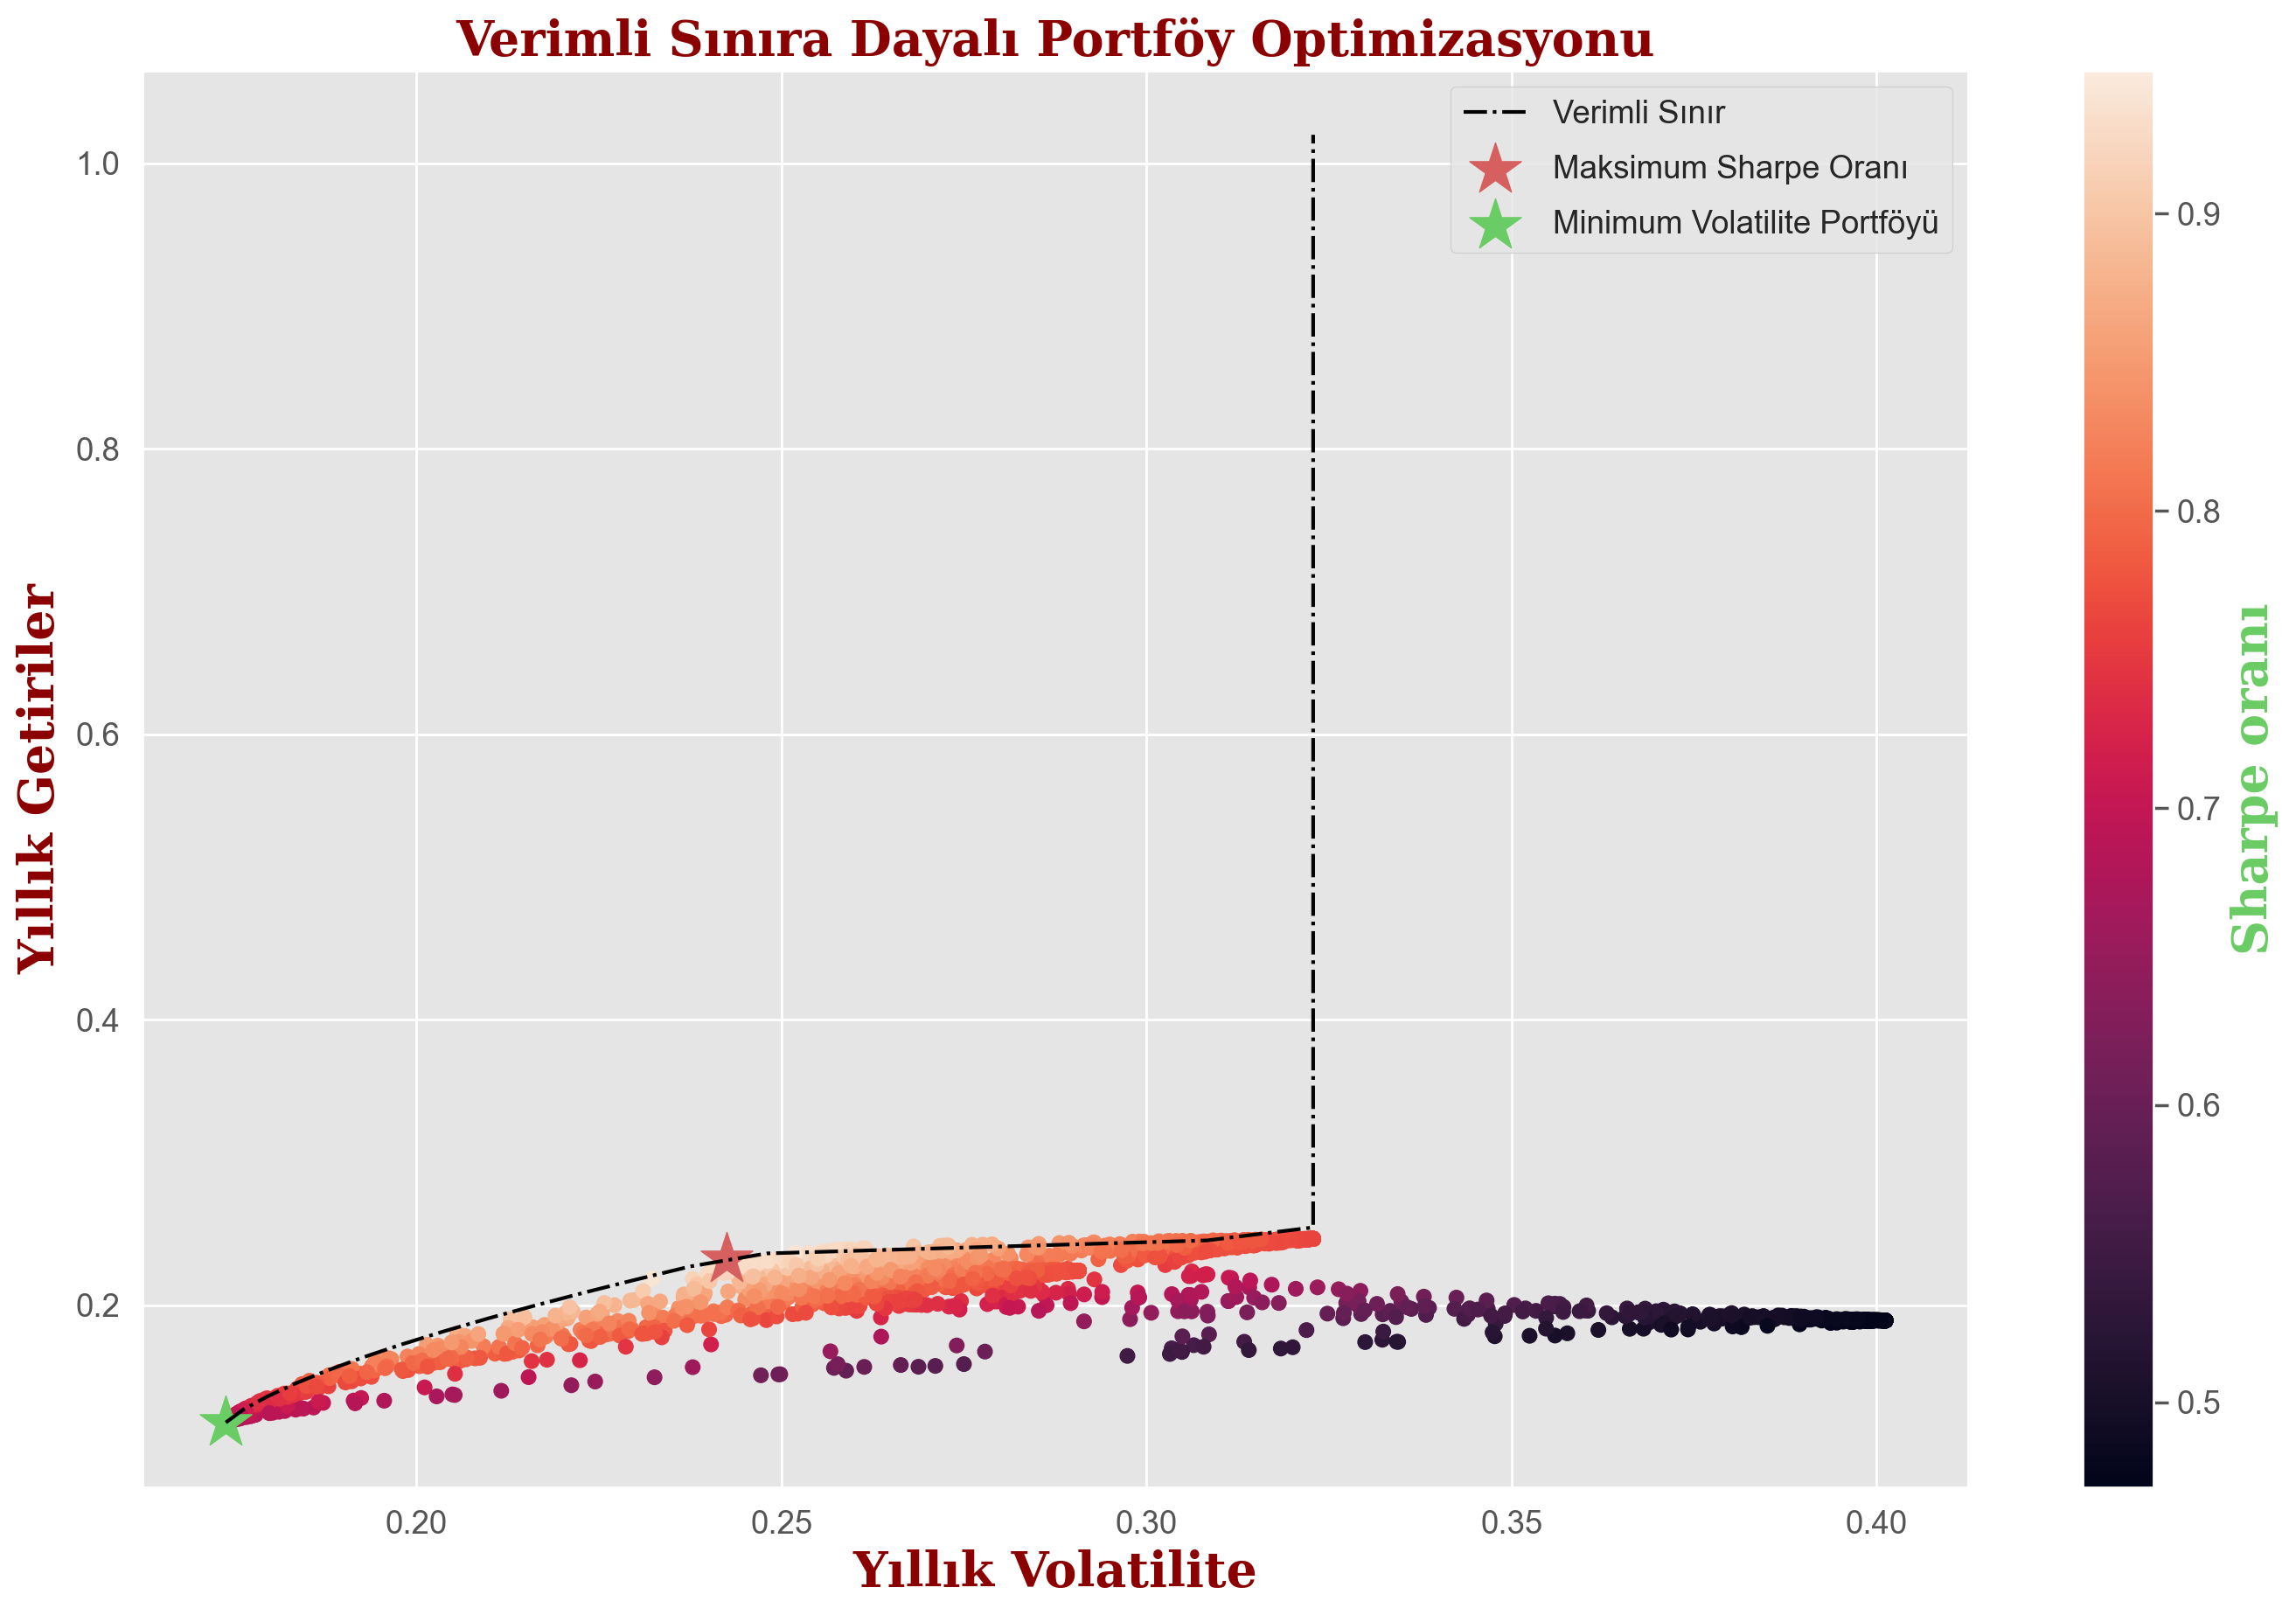

In [85]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe oranı', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Verimli Sınır')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maksimum Sharpe Oranı')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatilite Portföyü')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Verimli Sınıra Dayalı Portföy Optimizasyonu',fontdict=font1)
plt.xlabel('Yıllık Volatilite',fontdict=font2)
plt.ylabel('Yıllık Getiriler',fontdict=font2)
plt.legend(labelspacing=0.8)

## Rastgele portföy simülasyonu

Şimdi portföy optimizasyonunun en önemli adımına geçeceğiz: ağırlık limitli Dirichlet dağılımını kullanarak rastgele bir portföy simüle etmek. Dolayısıyla risksiz oranı 2,5$\%$ olan 10.000 portföy oluşturmaya çalışacağız. Bunu yapmak için, her portföy için yıl içindeki ağırlıklı ortalama getiri ve her portföyün standart sapması ve Sharpe oranı gibi performans ölçütlerini hesaplamamız gerekir.

### Gerekli fonksiyonları hesaplamak için temel formüller

In [86]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portföy performansı, yıllık getiriyi, keskin oranı hesaplayın
    portfolio_return = np.sum(mean_returns*weights)*252 # Borsada 252 iş günü
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # matrislerin np.dot çarpımı
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # rastgele simülasyon
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        # ağırlık vektörünü yineleyin ve sonuç dizisine veri ekleyin
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [87]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)

In [88]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) # portföyün rastgele seçilmesi/oluşturulması

In [89]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

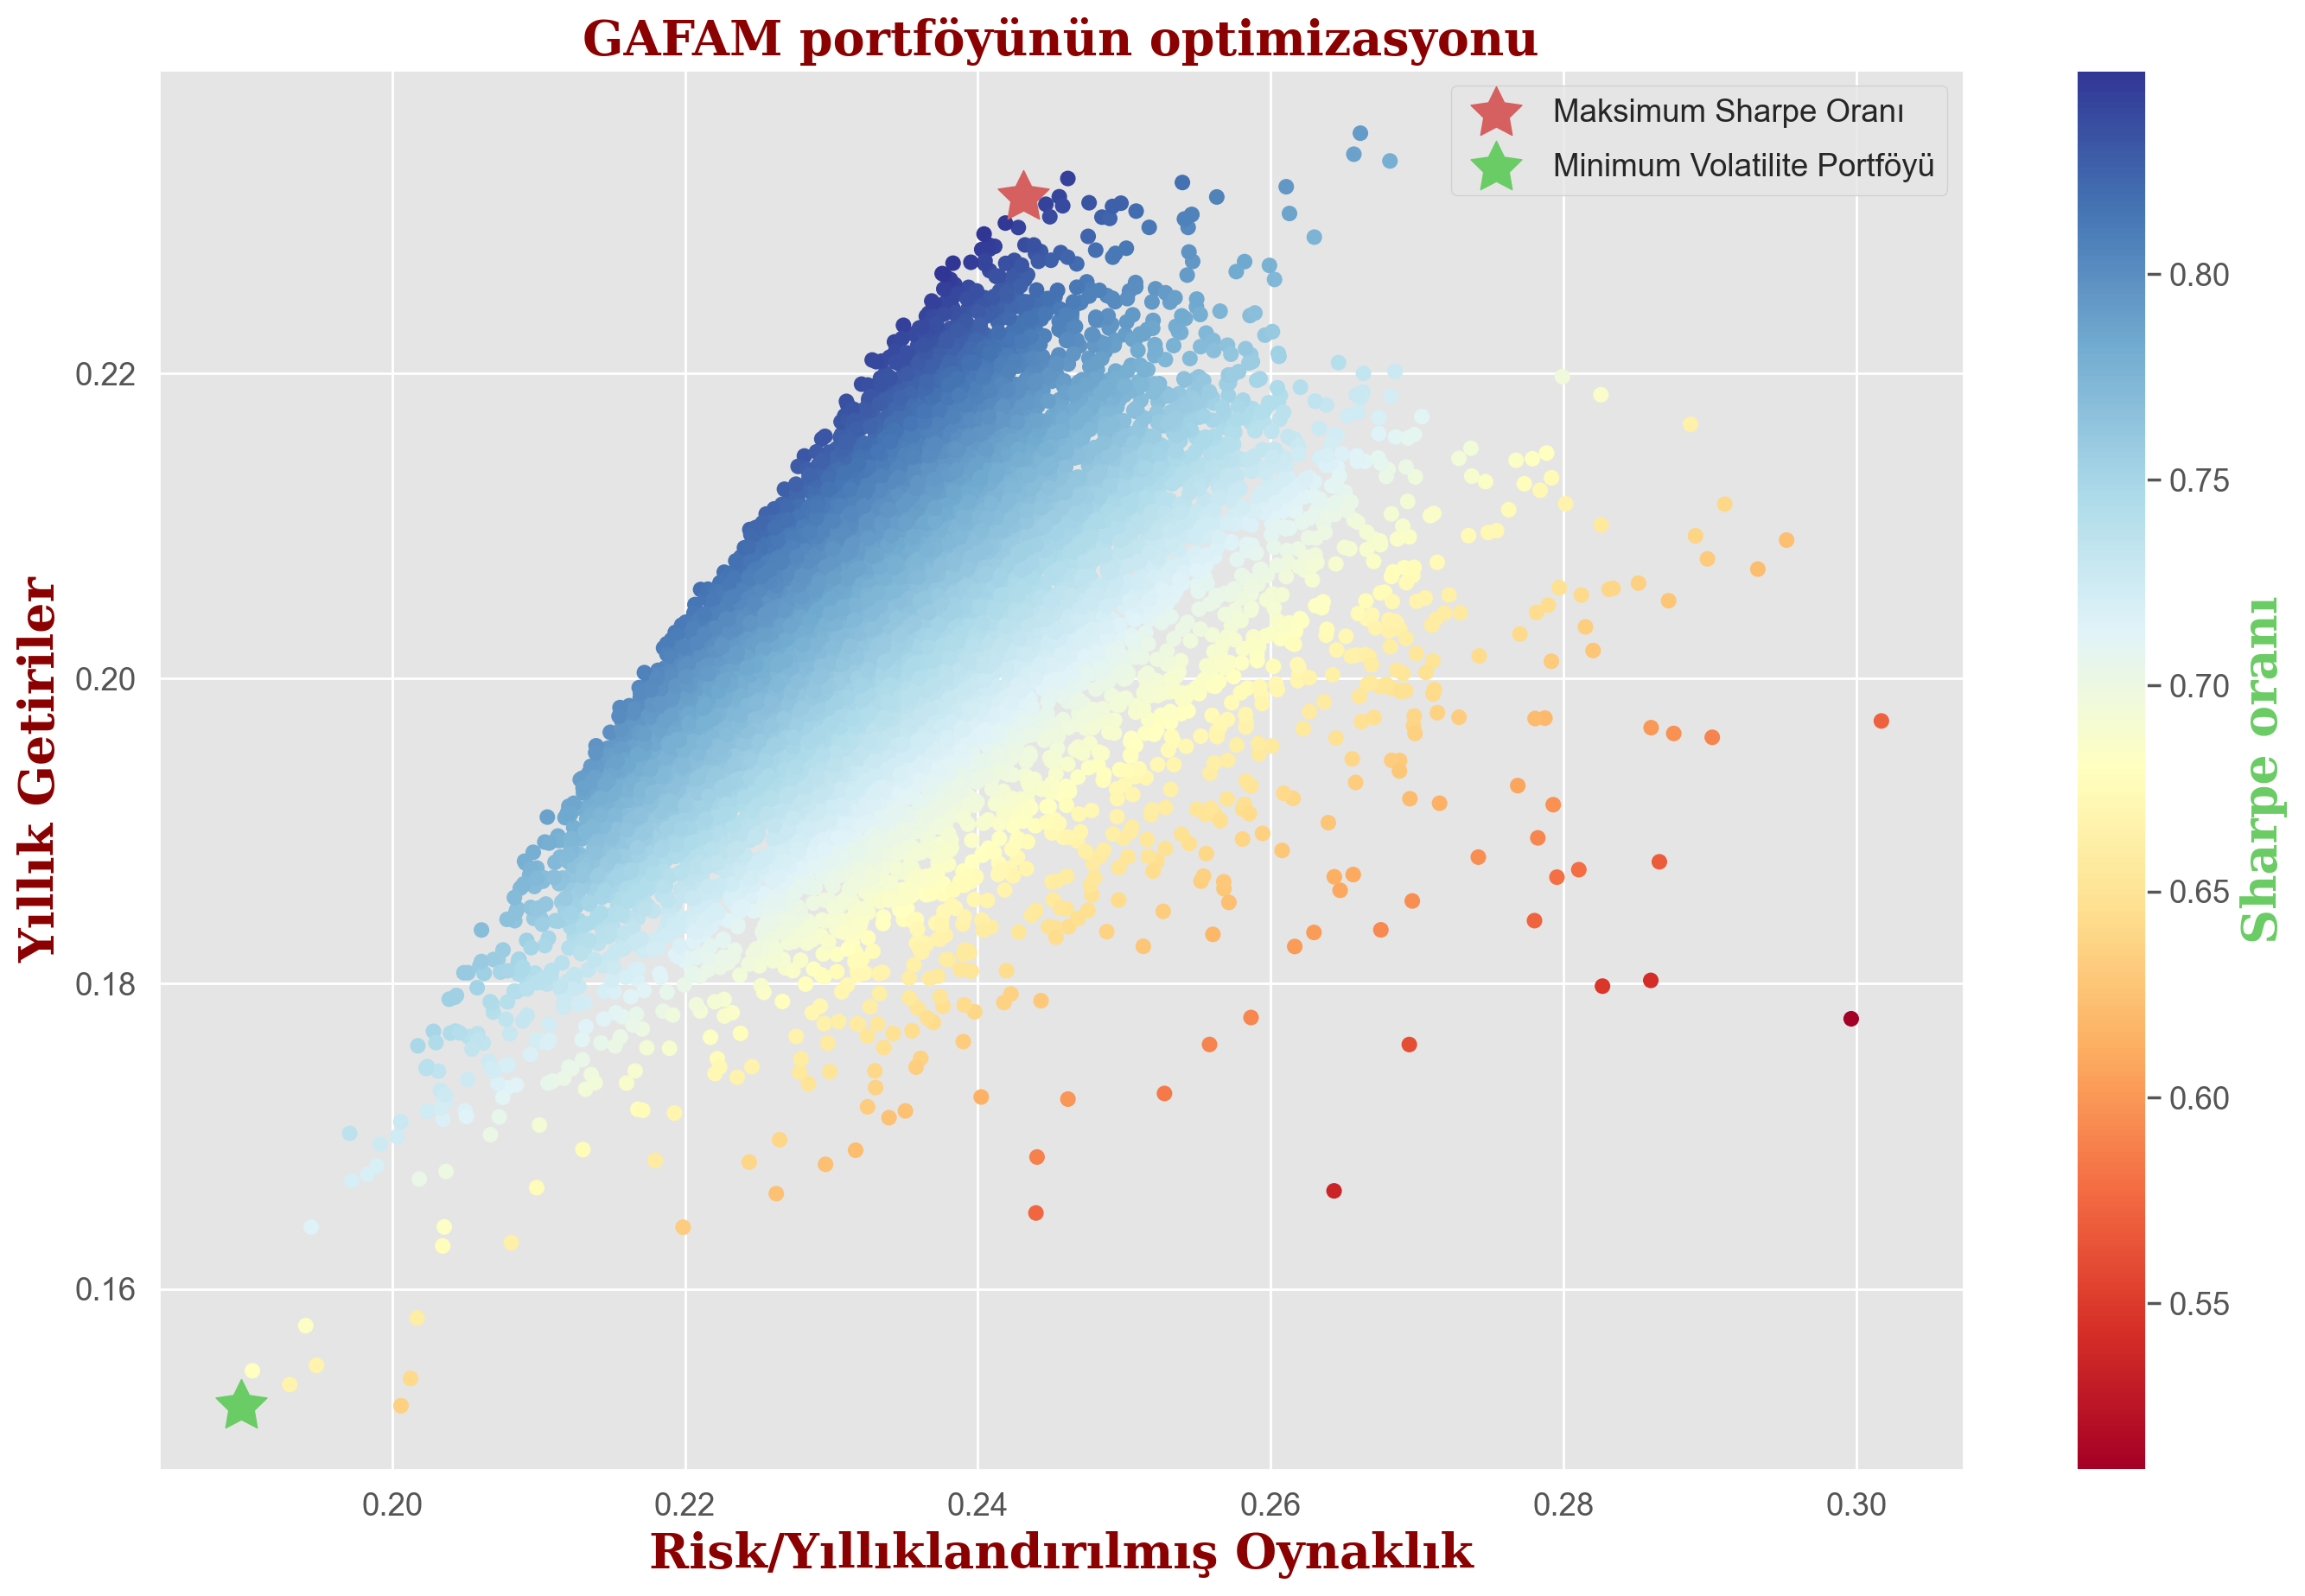

In [90]:
# En yüksek Sharpe Oranına sahip portföy konumunu bulun
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # maksimum keskin oranlı allık
# minimum standart sapma ile portföyün konumunu bulun
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # minimum oynaklık = minimum varyans portföyü dikey
# Sharpe Oranı ile renklendirilen dağılım grafiği oluşturun
plt.subplots(figsize=(15,10)) # Alt grafik ızgarasının satır/sütun sayısı
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') # Matplotlib'deki renk haritaları
plt.title('GAFAM portföyünün optimizasyonu',fontdict=font1)
plt.xlabel('Risk/Yıllıklandırılmış Oynaklık',fontdict=font2)
plt.ylabel('Yıllık Getiriler',fontdict=font2)
#plt.colorbar () # renk çubuğunu eşleştir
plt.colorbar().set_label('Sharpe oranı', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
# En yüksek Sharpe Oranına sahip portföyün konumunu vurgulamak için kırmızı yıldızı çizin
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maksimum Sharpe Oranı')
# Minimum değişkenlik portföyünün konumunu vurgulamak için yeşil yıldız çizin
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatilite Portföyü')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

> Şimdi GAFAM portföylerindeki varlıkların ağırlıklarına geçelim.

In [91]:
max_sharpe_port.to_frame().T #Sharpe oranı en yüksek portföy. yatırım getirisi daha düşük olduğunda negatiftir

ret    stdev    sharpe      GOOG      AAPL      META      AMZN  \
3270  0.231556  0.24312  0.849603  0.011955  0.269486  0.034679  0.209609   

          MSFT      GSPC  
3270  0.469536  0.004734

In [92]:
min_vol_port.to_frame().T # En düşük varyans portföyüne sahip portföy

ret     stdev   sharpe      GOOG     AAPL      META      AMZN  \
2695  0.152335  0.189673  0.67134  0.129409  0.07794  0.052775  0.016958   

          MSFT      GSPC  
2695  0.079501  0.643417

> Sharpe oranının en yüksek olduğu portföydeki ağırlık tablosuna bakıldığında Microsoft'un diğer şirketlere göre daha fazla ağırlığa sahip olduğunu görüyoruz. Karşılaştırıldığında, Facebook'un minimum varyans portföyünde daha düşük bir ağırlığı var. Bu iki ağırlık arasında daha iyi olan portföyün yüksek riskli portföy olduğu sonucuna varabiliriz. Riske göre düzeltilmiş getiriyi dikkate aldığımızda bu portföy, minimum varyans portföyüne göre en yüksek Sharpe oranını ($0,953\%$) vermiştir, yani yatırımcının ek risk karşılığında en yüksek fazla getiriyi alacağı portföydür. o alacak.

## Çözüm

> Sonuç olarak Google, Apple, Facebook, Amazon, Microsoft ve S&P 500 gibi şirketlerin borsa verilerinin analizi değerli bilgiler sağladı.

* **Volatilite**: Yıllık ve aylık dalgalanmaların incelenmesi, Meta'nın hisse senetleri arasında en yüksek oynaklığı sergilediğini ortaya çıkardı; bu da daha büyük fiyat dalgalanmalarına ve potansiyel riske işaret ediyor. Bu bilgi, yatırımcıların bu hisse senetlerinin risk profillerini anlamalarına ve bilinçli yatırım kararları vermelerine yardımcı olabilir.

* **Korelasyon**: Korelasyon analizi, S&P 500 ile Microsoft, Amazon ve Microsoft ile Google, Google ve Apple ve Amazon ve Microsoft arasında güçlü pozitif korelasyonlar olduğunu gösterdi. Bu korelasyonlar potansiyel karşılıklı bağımlılıklara işaret eder ve portföy çeşitlendirme stratejilerine rehberlik edebilir.

* **Riske Göre Ayarlanmış Getiriler**: Sharpe oranlarının değerlendirilmesi, hisse senetlerinin riske göre düzeltilmiş performansı hakkında fikir verdi. Microsoft, en yüksek Sharpe oranına sahip hisse senedi olarak ortaya çıktı; bu, diğer hisse senetlerine ve risksiz yatırıma kıyasla daha iyi riske göre ayarlanmış getiri elde etme potansiyelini gösteriyor.

> Genel olarak bu bulgular, yatırım amaçlı hisse senetlerini analiz ederken ve seçerken volatilite, korelasyon ve riske göre ayarlanmış getiriler gibi faktörlerin dikkate alınmasının önemini vurgulamaktadır. Yatırımcılar bu temel ölçümleri dikkate alarak daha bilinçli kararlar alabilir, riski etkili bir şekilde yönetebilir ve yatırım portföylerini potansiyel olarak optimize edebilir.

# Referanslar

- [Volatilite ve Sharpe d'une eyleminin oranı | Finans için Python](https://youtu.be/RrsJUaAWdEs)

- [Présentation projet analyze des données financières - Nour Mzoughi - Gestion des portefeuilles MEDAF](https://www.youtube.com/watch?v=73boS4j4zss&list=TLPQMDMwMzIwMjNZlMI_TgJCWA&index=1)

- [Volatilite Bir Hisse Senedinin Getirisini Nasıl Etkiler: Python ile Test Edilmiştir](https://medium.com/analytics-vidhya/how-volatility-affects-a-stocks-return-tested-with-python-cdf7470d3808)
- [Scratch'ten Hisse Senedi ve CAPM Betası](https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch)

- [Bir portföyün Sharpe oranını hesaplamak için Python'u kullanın](https://towardsdatascience.com/calculated-sharpe-ratio-with-python-755dcb346805)
- [Pandalar ve NumPy ile Sharpe Oranı Nasıl Hesaplanır](https://www.learnpythonwithrune.org/how-to-calculate-sharpe-ratio-with-pandas-and-numpy/)
- [Python Kullanarak Portföy Yönetimi — Portföy Optimizasyonu](https://pub.towardsai.net/portfolio-management-using-python-portfolio-optimization-8a90dd2a21d)
- [Python ile Volatilite ve Riske Ayarlanmış Getiri Ölçüleri](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-Based-on-volatility/)
- [Finans için Python: Risk ve Getiri](https://www.learnpythonwithrune.org/python-for-finance-risk-and-return/)

- [Pratik Örneklerle Efficient Frontier Kullanarak Python ile Portföy Optimizasyonu](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/)

- [Python'da Verimli Sınır — Ayrıntılı Eğitim](https://towardsdatascience.com/third-frontier-in-python-detailed-tutorial-84a304f03e79)

- [Python'da MPT kullanarak Portföy Optimizasyonu](https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/)

- [Python'da Efficient Frontier-Markowitz portföy optimizasyonu](https://github.com/aghanhussain/Markowitz-Portfolio-Optimization-with-Python/blob/master/The%20Efficient%20Frontier-Markowitz%20portfolio%20optimization%20in%20Python.ipynb)

- [Python Kullanarak Verimli Sınırı Göstermek İçin Binlerce Rastgele Portföyün Simülasyonu](https://www.interviewqs.com/blog/third-frontier)

- [Python ile finansal portföylerin simülasyonu nasıl yapılır](https://towardsdatascience.com/how-to-simulate-financial-portfolios-with-python-d0dc4b52a278)

- [Python kullanarak portföy simülasyonu ve verimli sınır (MPT)](https://medium.com/@akjha22/portfolio-simulation-third-frontier-mpt-using-python-1ab99dd47efb)